In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from library import utils, config

In [2]:
!ls results/7-9/

cascadePortf_minsep1_501_1000_100_new2threshold_fixedhurst.pkl
cascades_minsep1_501_1000_100_new2threshold_fixedhurst.pkl
cascadesTime_minsep1_501_1000_100_new2threshold_fixedhurst.pkl
cascadeStocks_minsep1_501_1000_100_new2threshold_fixedhurst.pkl
config_1000_1000_90_new2thresholded.txt
config_500_1000_60_new2thresholded.txt
config_501_1000_100_new2thresholded_fixedhurst.txt
config_501_1000_100_new2thresholded.txt
hurstPool_1000_1000_90_new2threshold.npy
hurstPool_500_1000_60_new2threshold.npy
hurstPool_501_1000_100_new2threshold_fixedhurst.npy
hurstPool_501_1000_100_new2threshold.npy
stockPool_1000_1000_90_new2threshold.npy
stockPool_500_1000_60_new2threshold.npy
stockPool_501_1000_100_new2threshold_fixedhurst.npy
stockPool_501_1000_100_new2threshold.npy
totalOrders_1000_1000_90_new2threshold.csv
totalOrders_500_1000_60_new2threshold.csv
totalOrders_501_1000_100_new2threshold.csv
totalOrders_501_1000_100_new2threshold_fixedhurst.csv
traderIDs_1000_1000_90_new2threshold.pkl
traderIDs_

In [2]:
with open('./results/7-9/traderIDs_501_1000_100_new2threshold_fixedhurst.pkl', 'rb') as f:
    traderIDs = pickle.load(f)

Importing MATLAB


In [3]:
stockPool = np.load("./results/7-9/stockPool_501_1000_100_new2threshold_fixedhurst.npy")
hurstPool = np.load("./results/7-9/hurstPool_501_1000_100_new2threshold_fixedhurst.npy")
Ttransactions = pd.read_csv("./results/7-9/transactions_501_1000_100_new2threshold_fixedhurst.csv")
TtotalOrders = pd.read_csv("./results/7-9/totalOrders_501_1000_100_new2threshold_fixedhurst.csv")

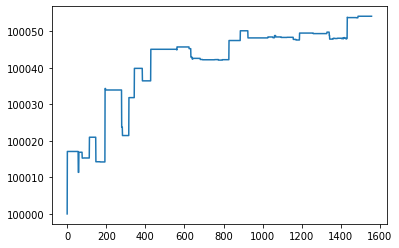

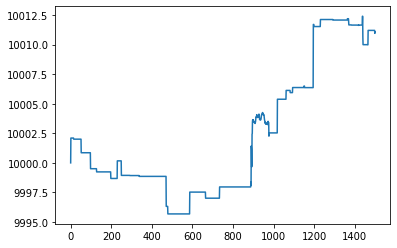

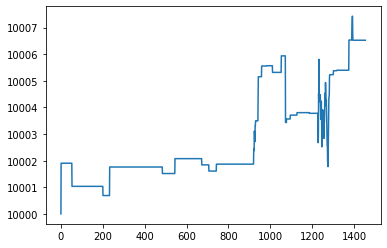

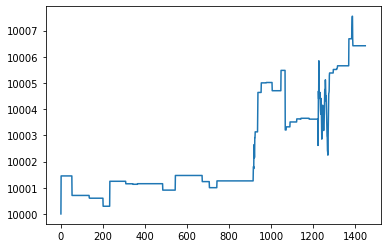

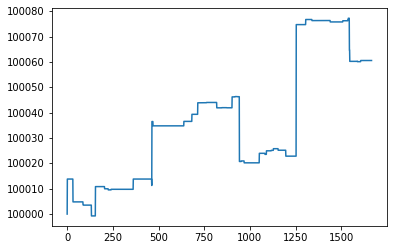

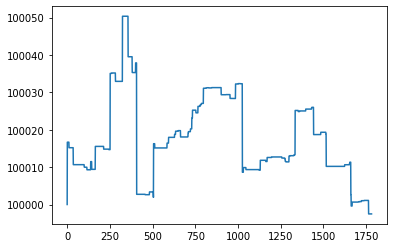

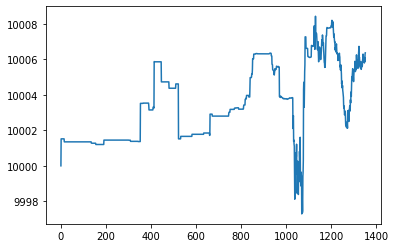

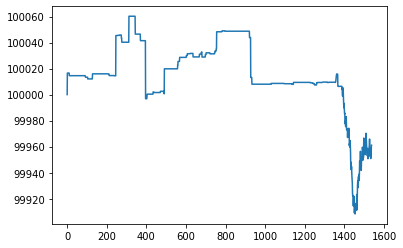

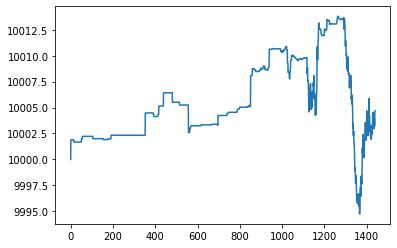

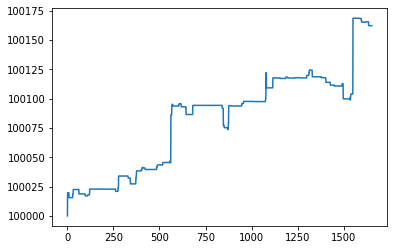

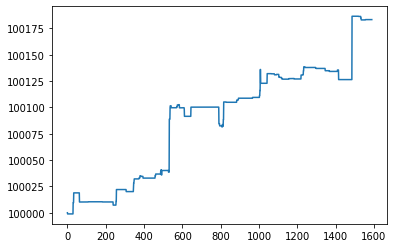

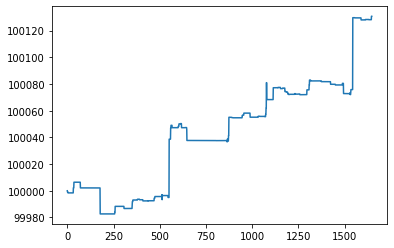

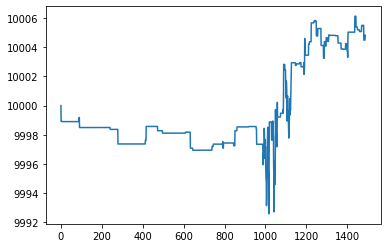

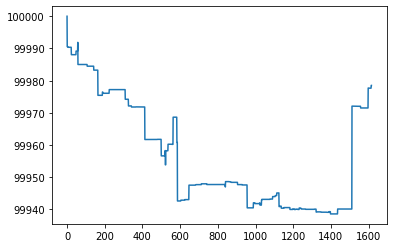

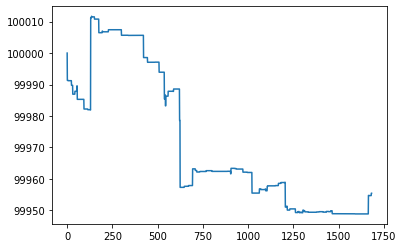

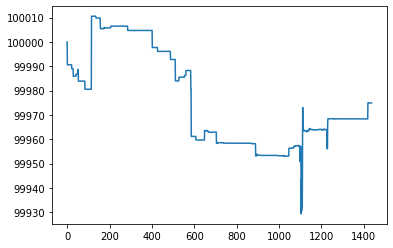

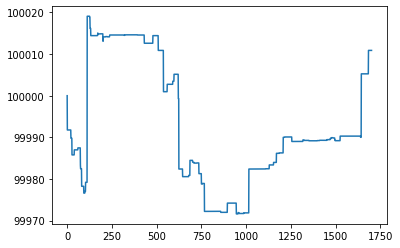

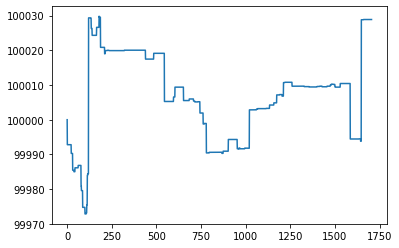

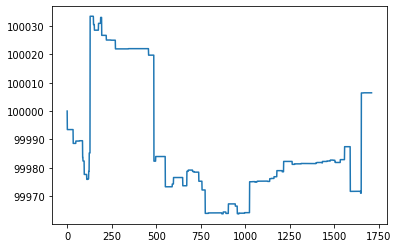

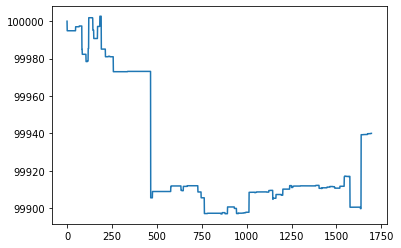

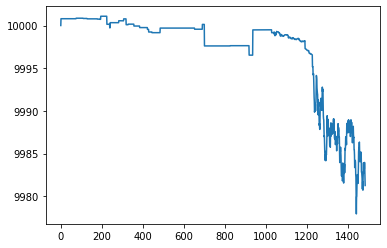

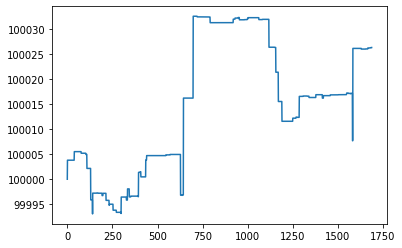

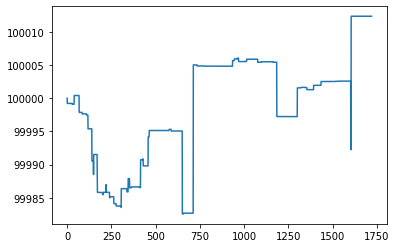

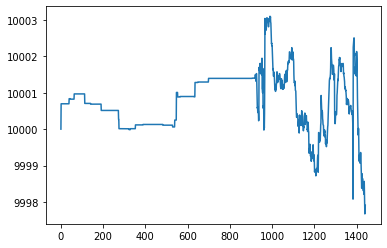

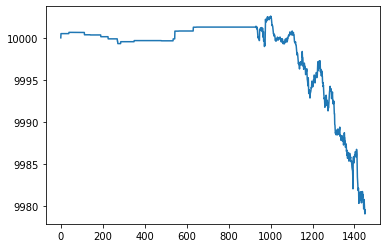

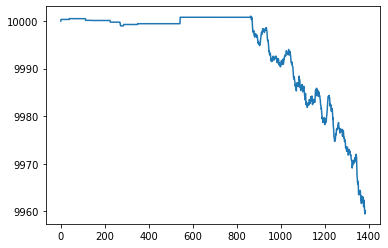

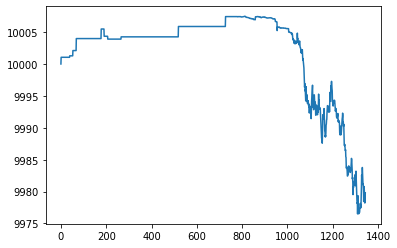

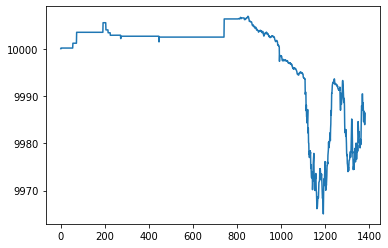

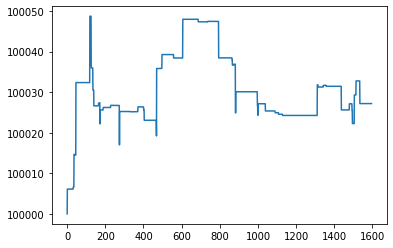

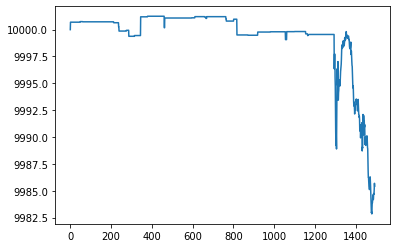

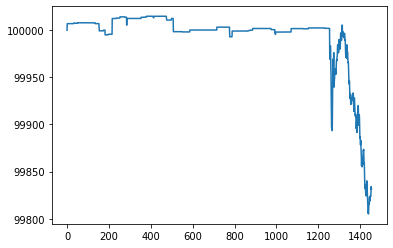

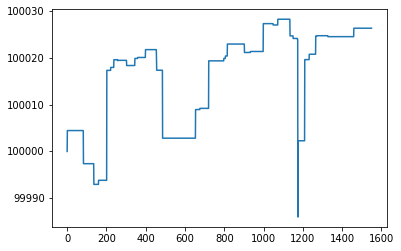

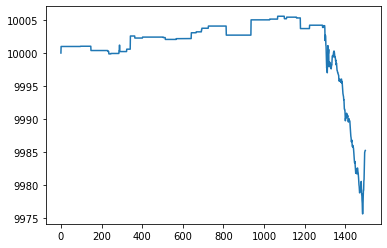

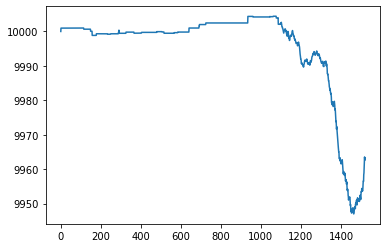

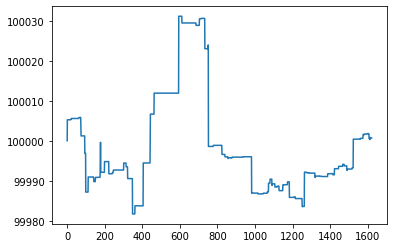

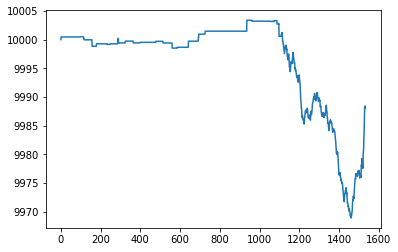

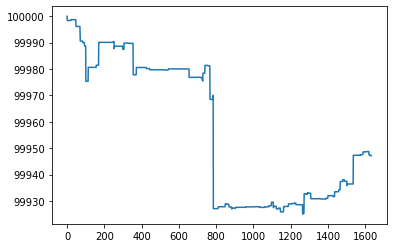

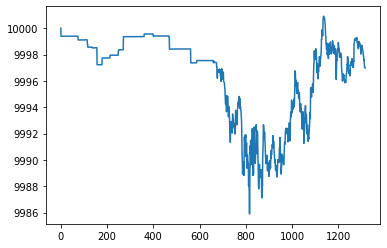

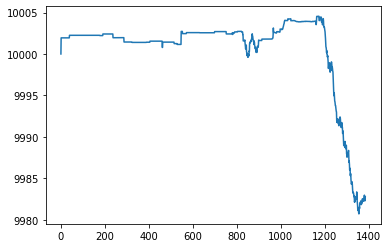

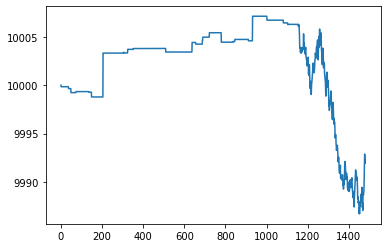

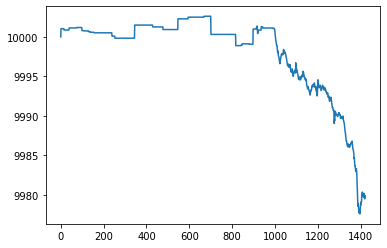

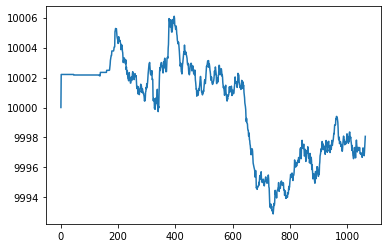

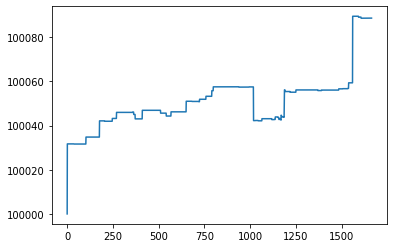

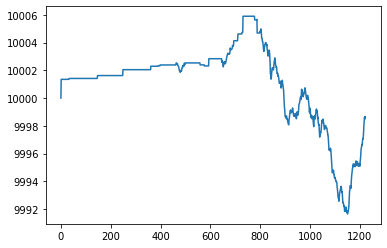

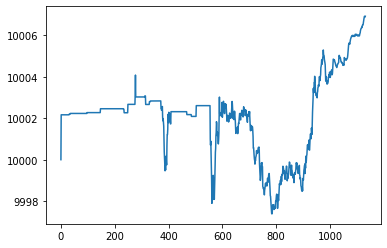

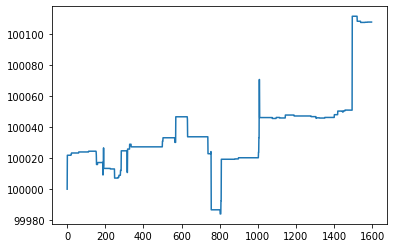

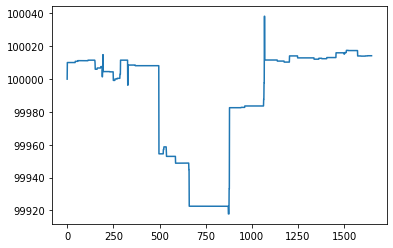

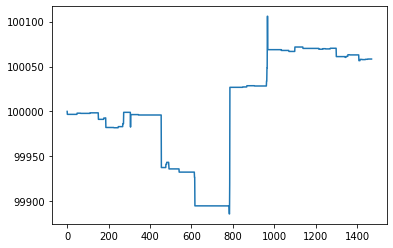

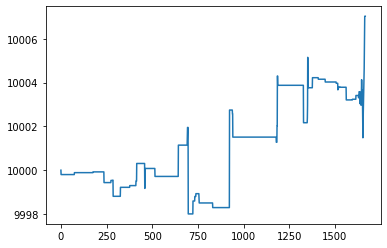

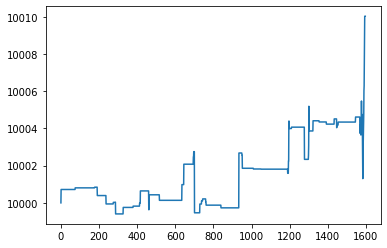

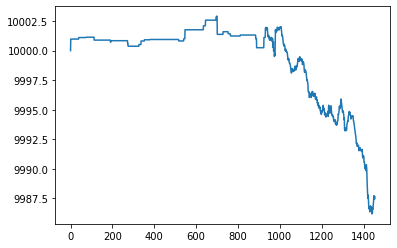

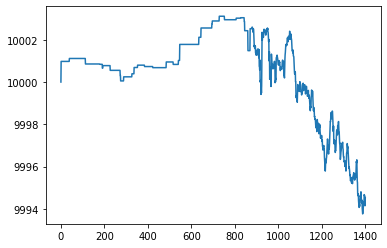

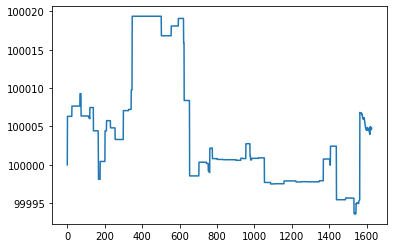

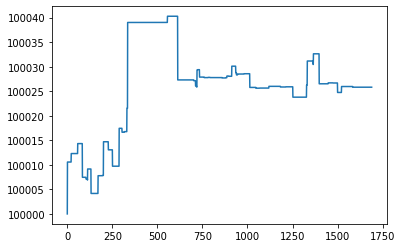

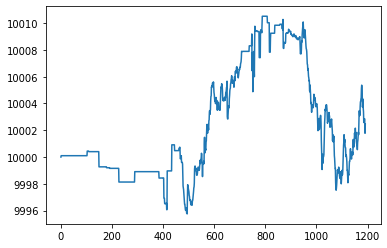

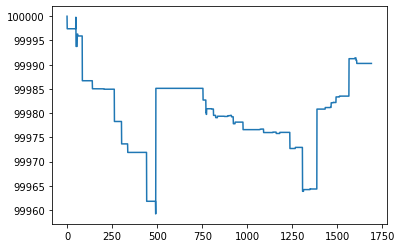

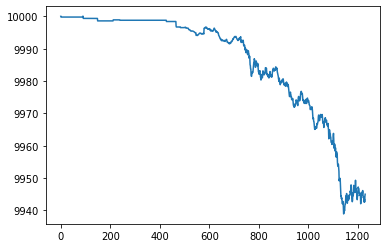

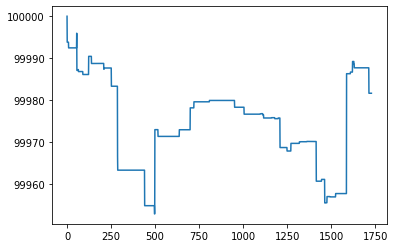

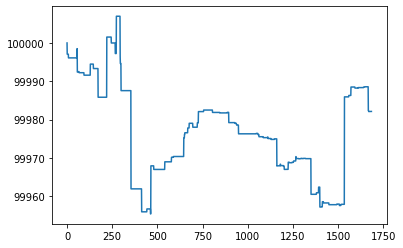

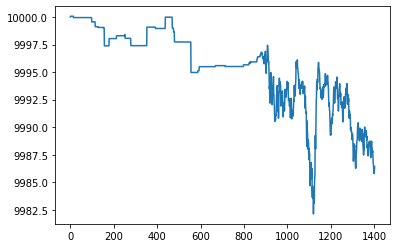

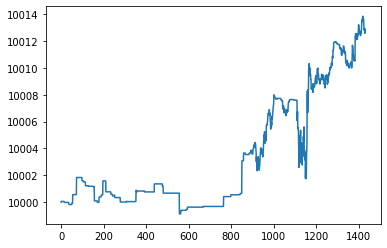

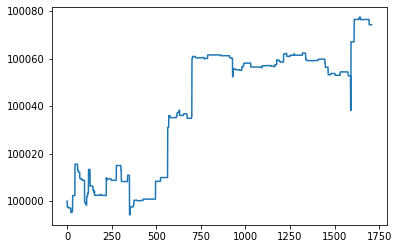

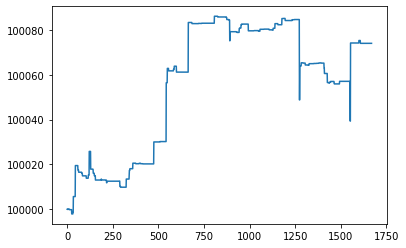

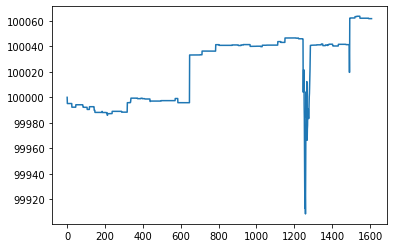

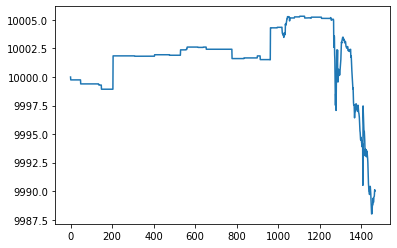

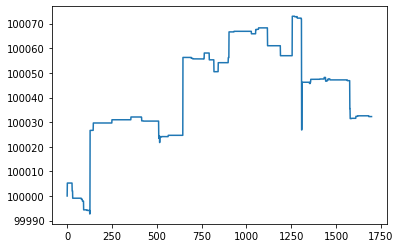

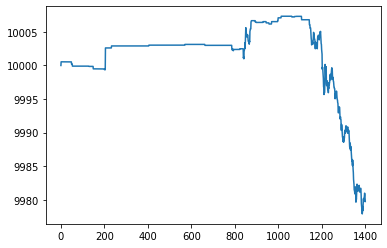

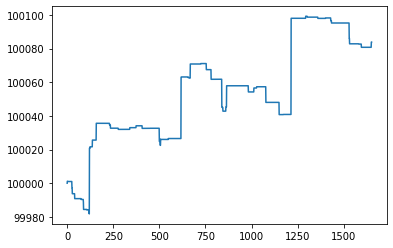

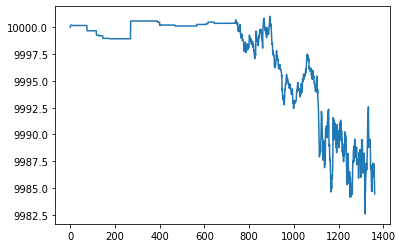

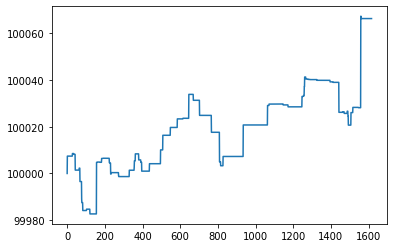

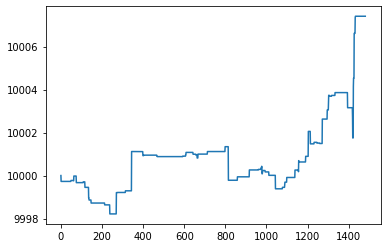

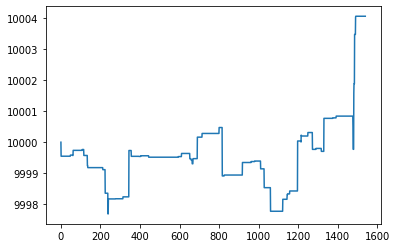

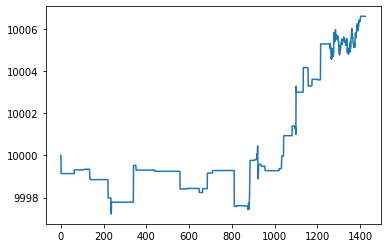

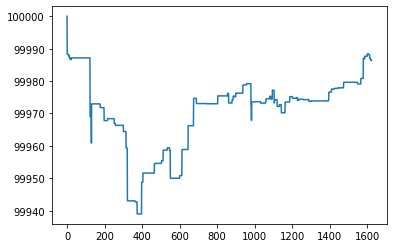

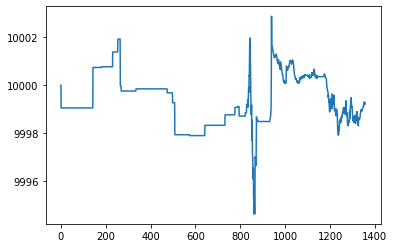

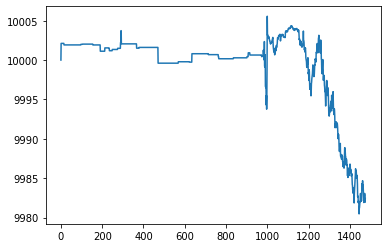

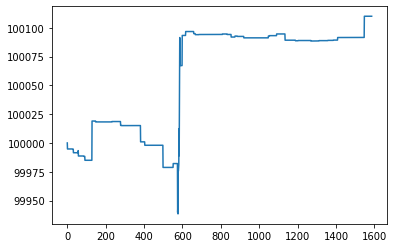

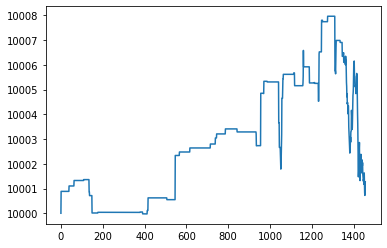

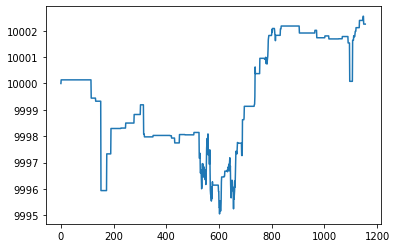

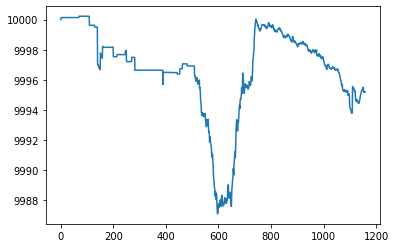

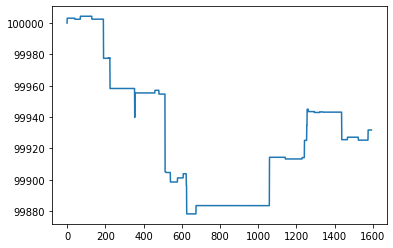

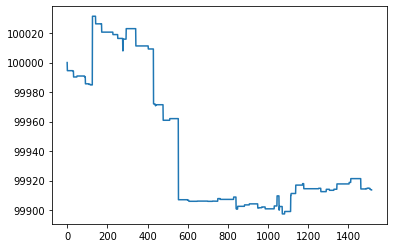

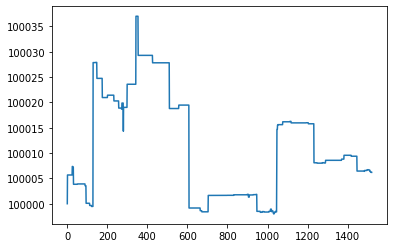

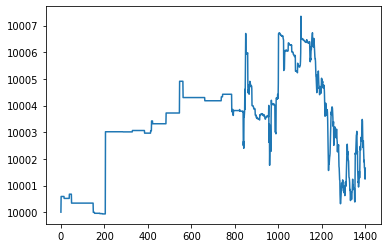

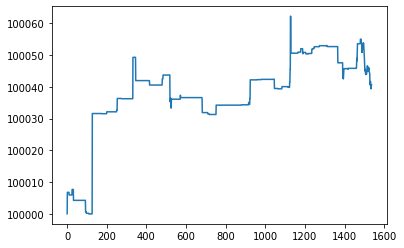

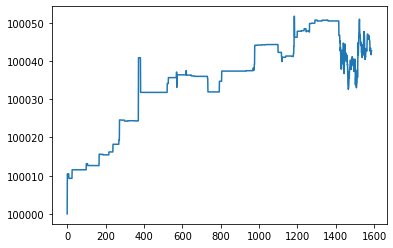

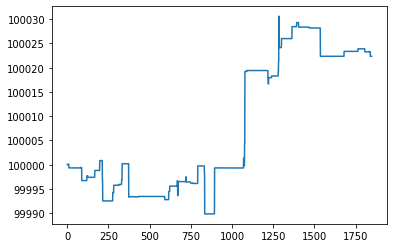

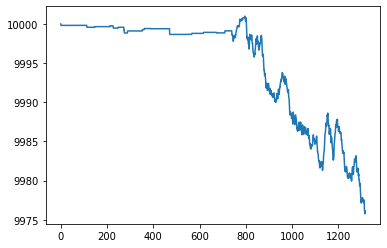

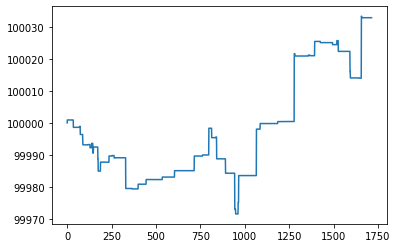

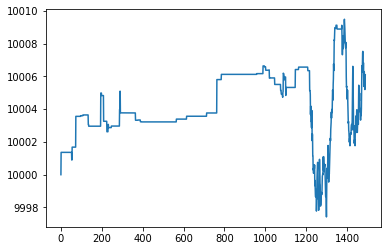

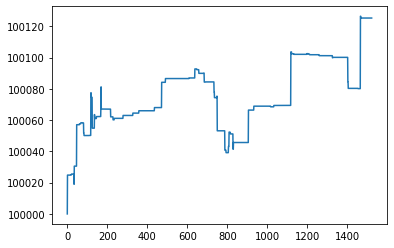

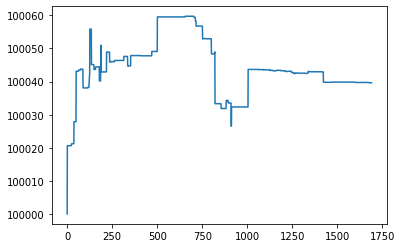

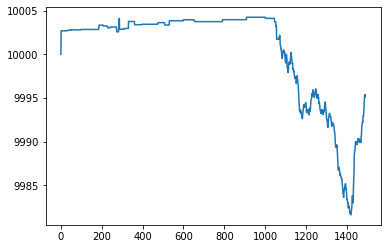

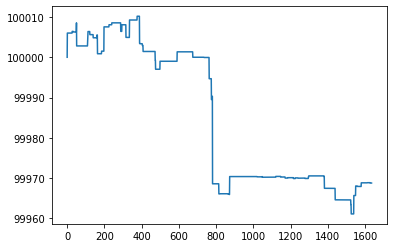

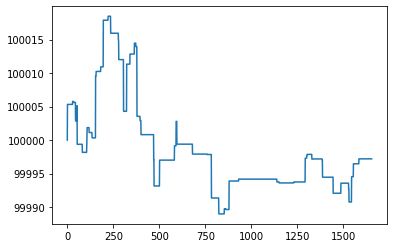

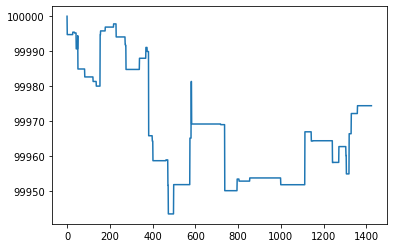

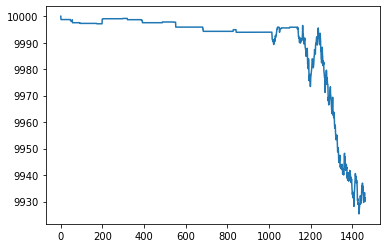

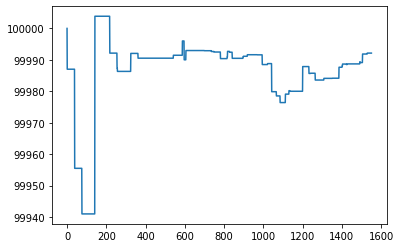

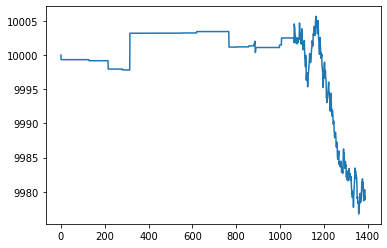

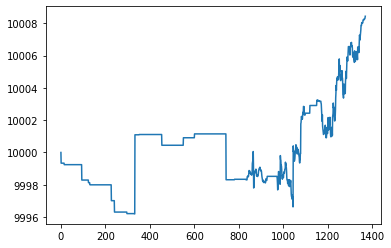

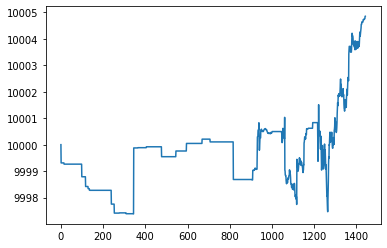

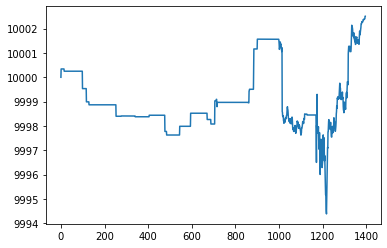

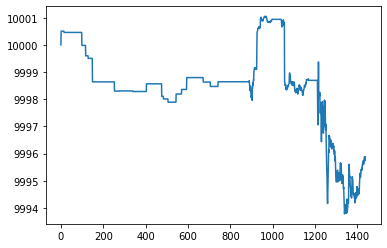

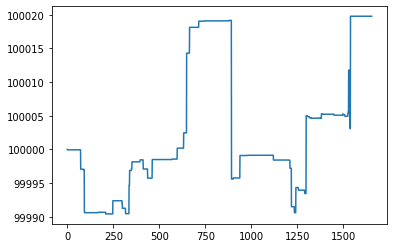

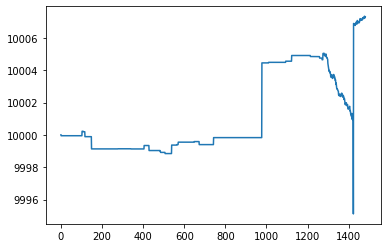

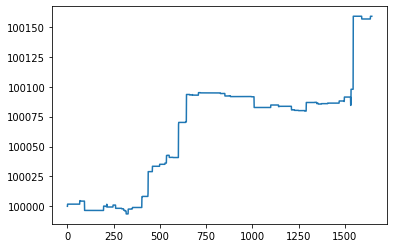

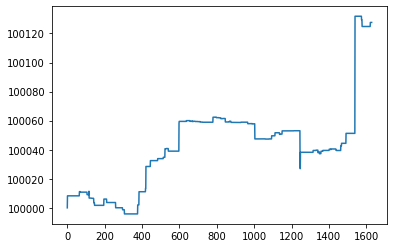

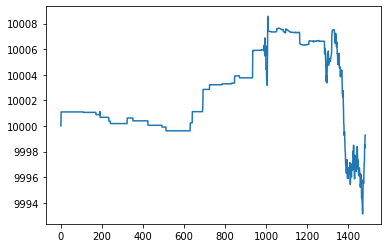

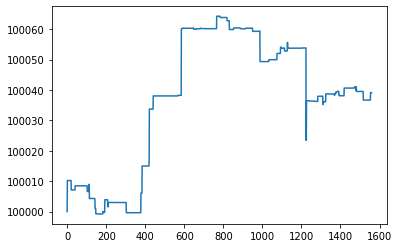

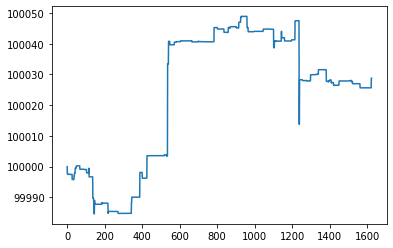

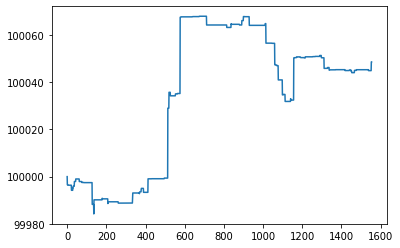

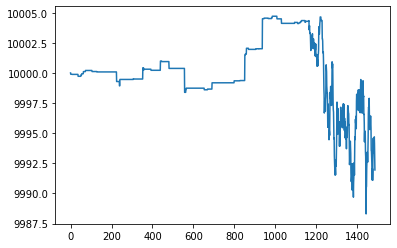

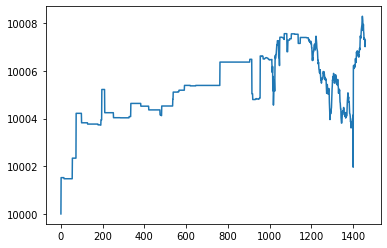

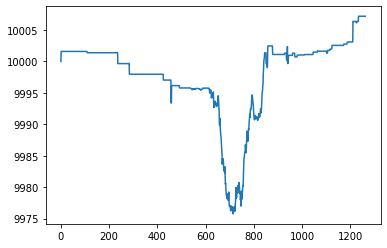

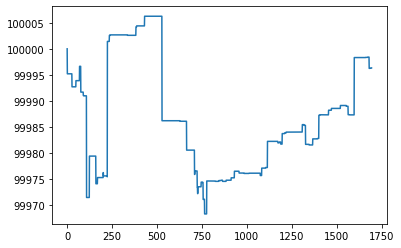

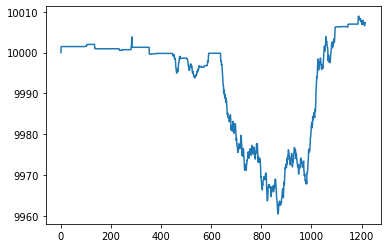

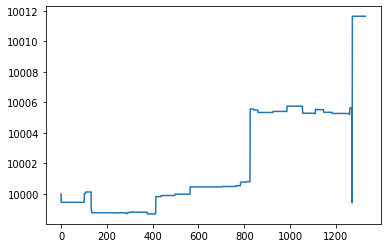

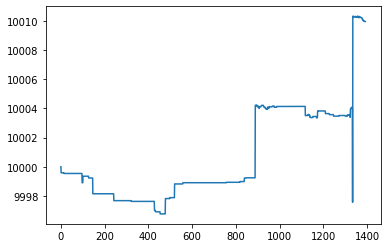

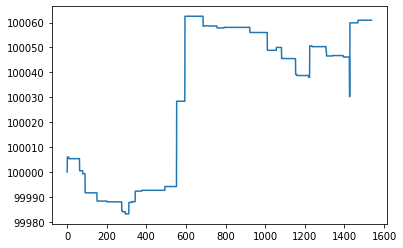

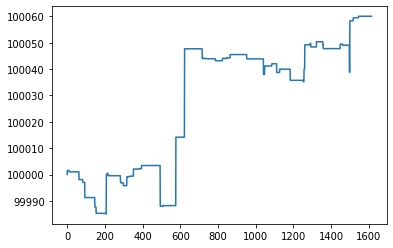

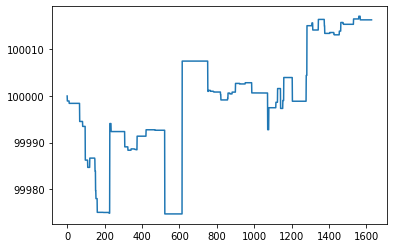

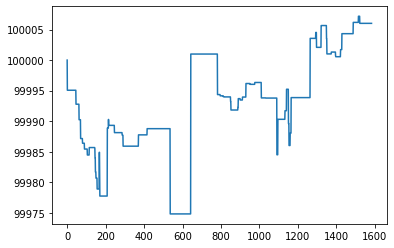

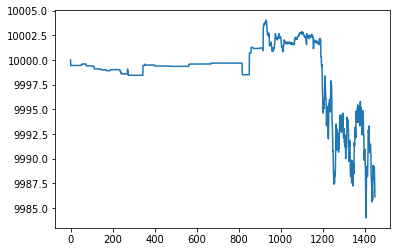

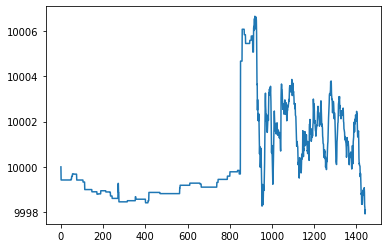

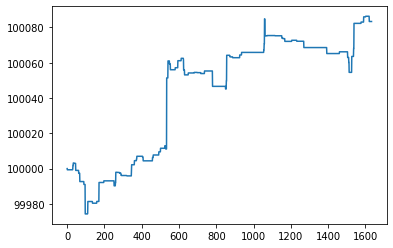

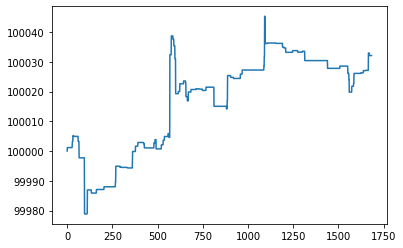

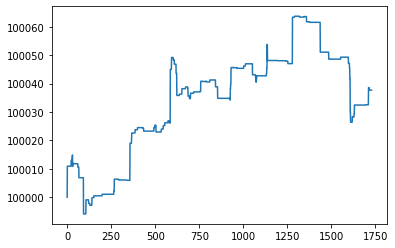

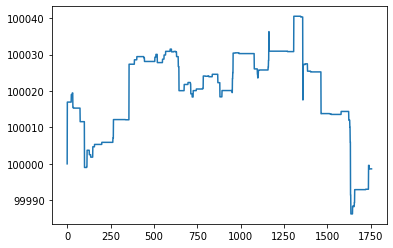

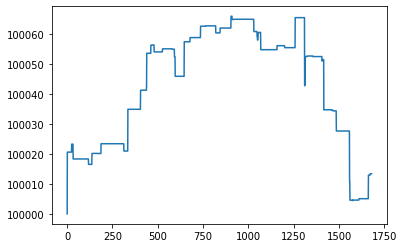

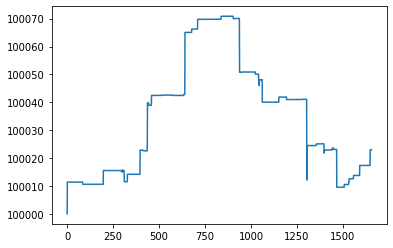

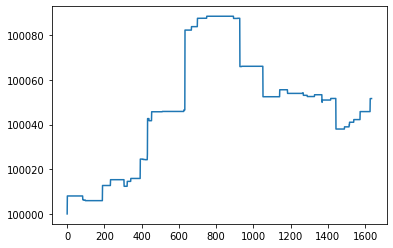

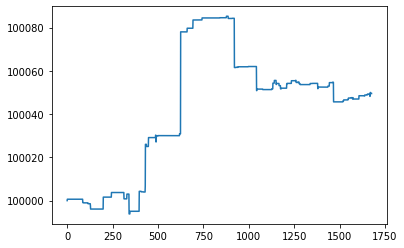

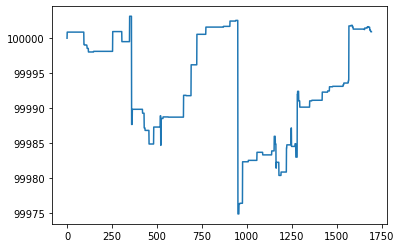

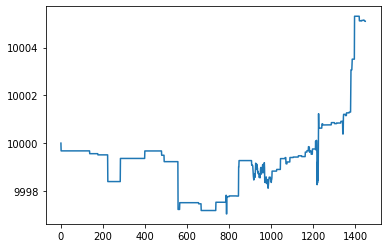

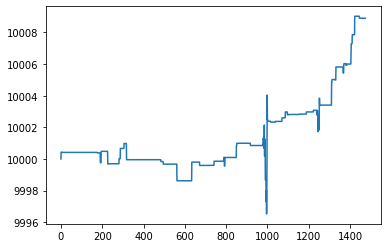

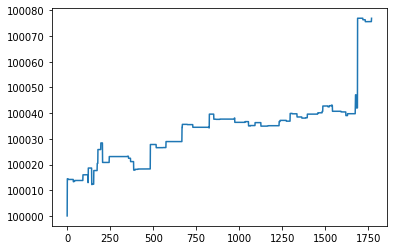

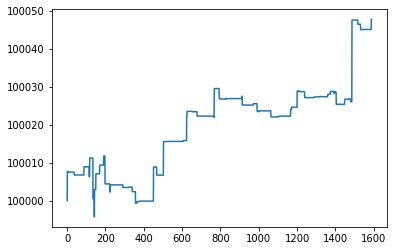

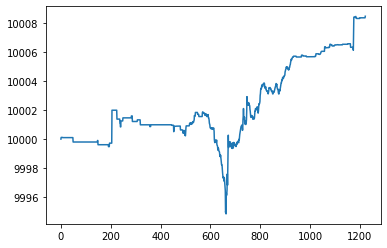

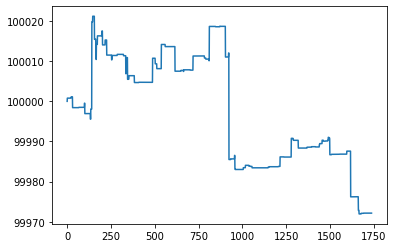

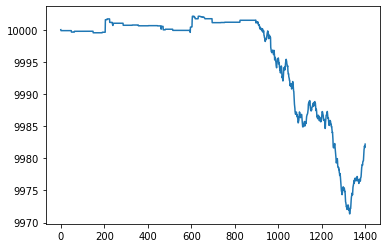

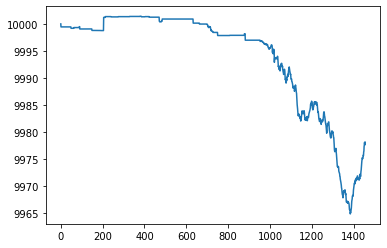

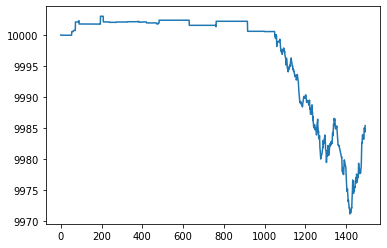

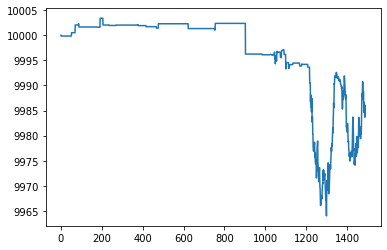

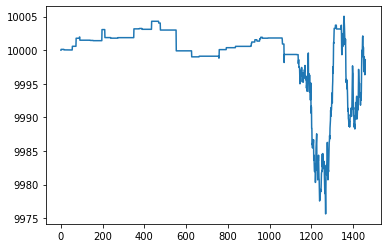

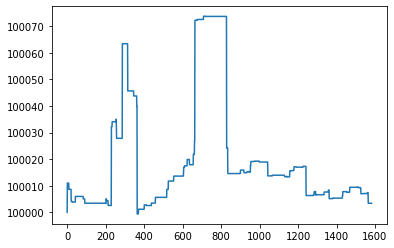

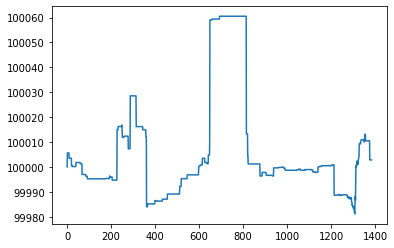

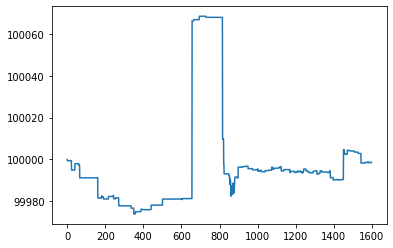

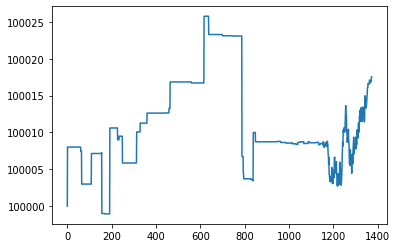

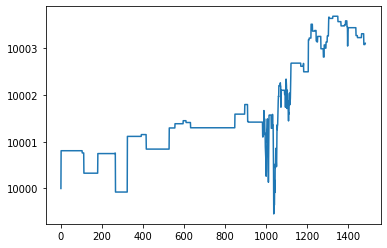

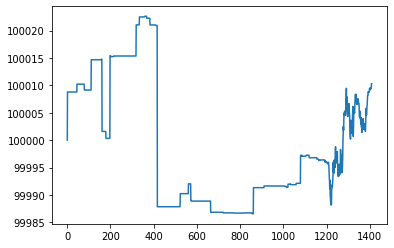

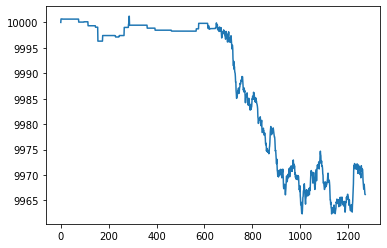

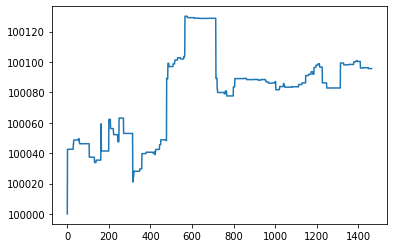

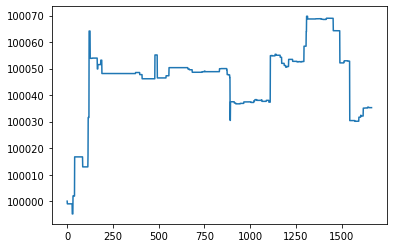

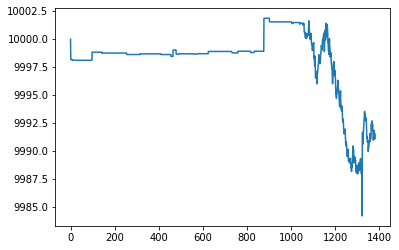

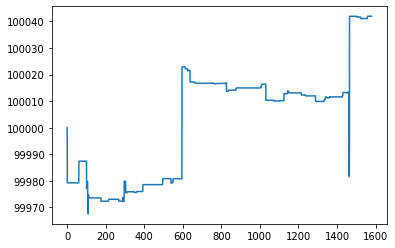

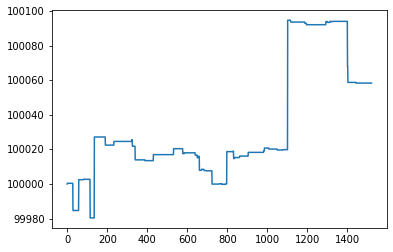

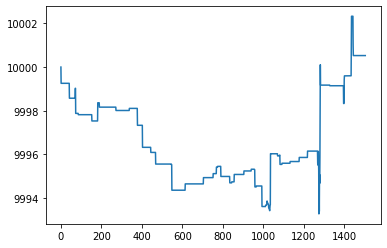

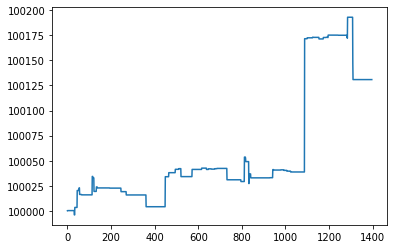

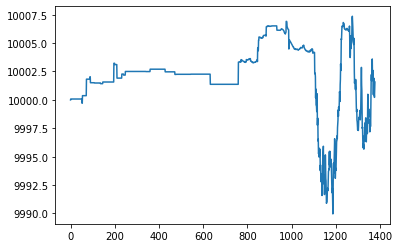

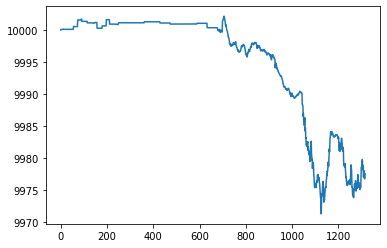

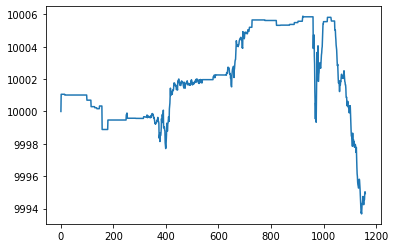

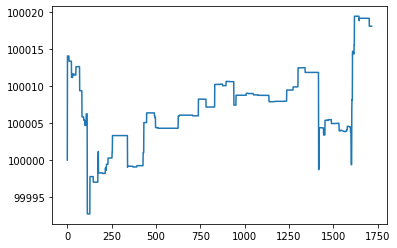

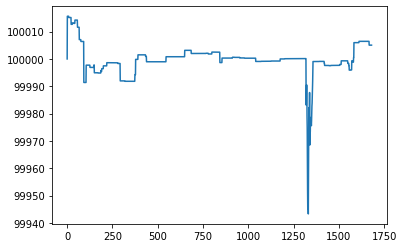

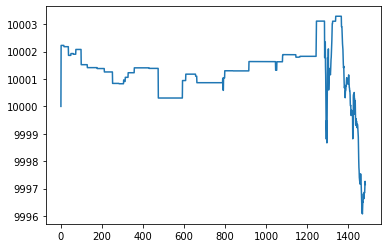

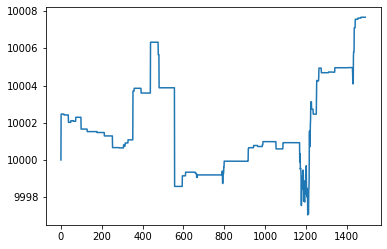

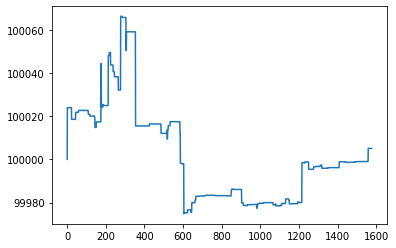

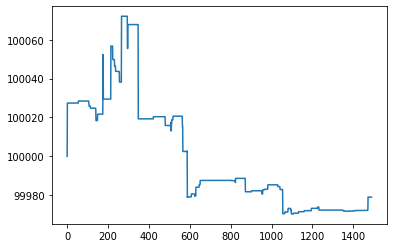

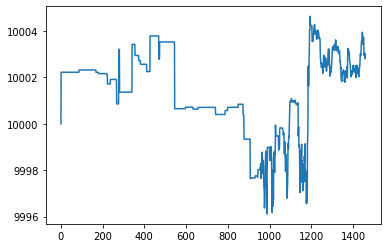

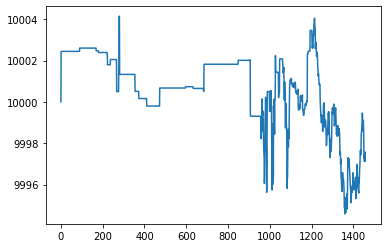

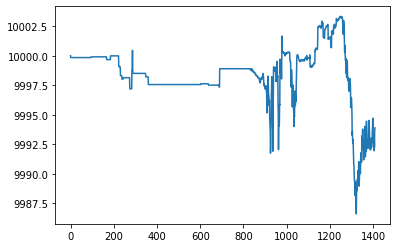

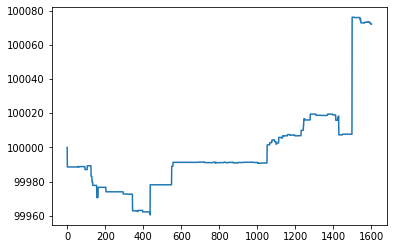

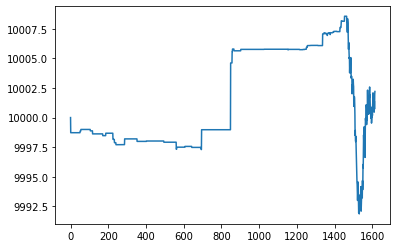

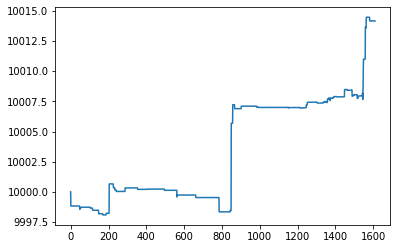

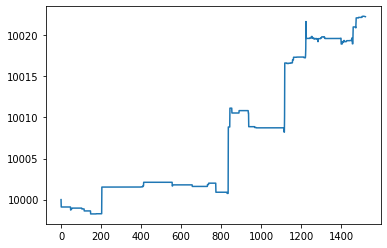

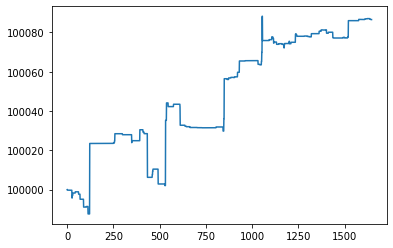

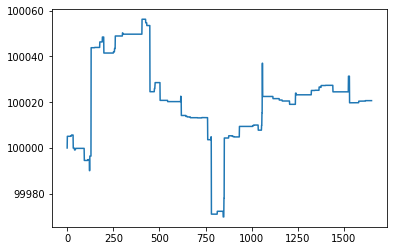

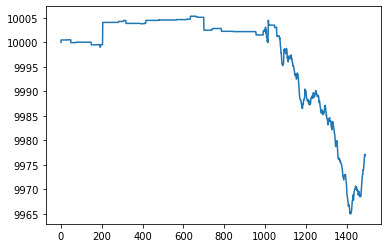

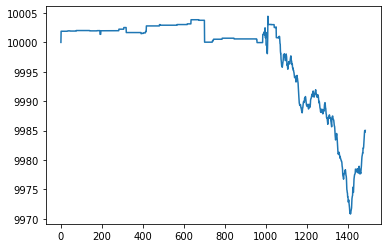

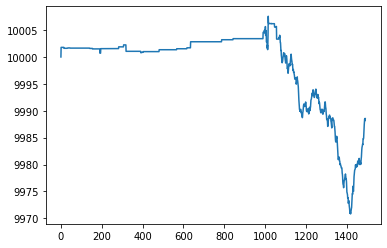

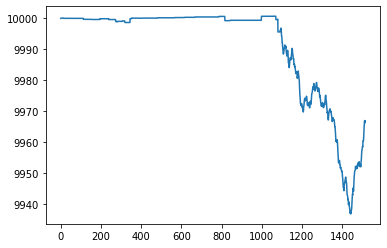

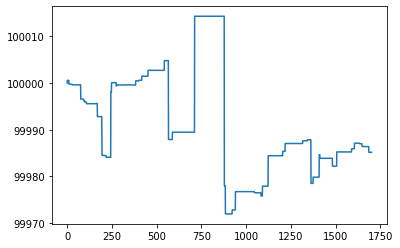

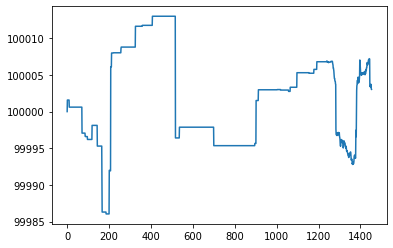

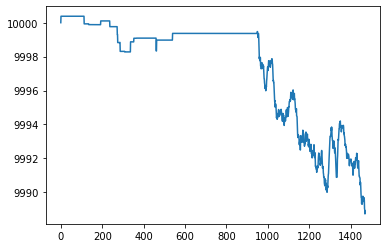

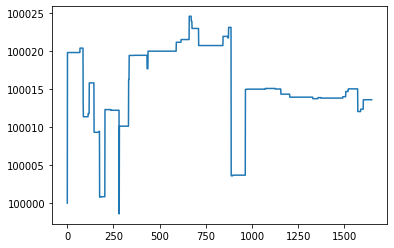

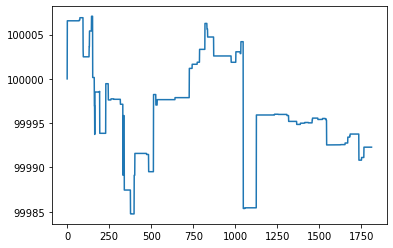

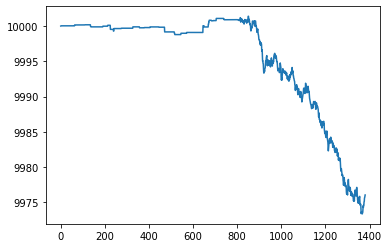

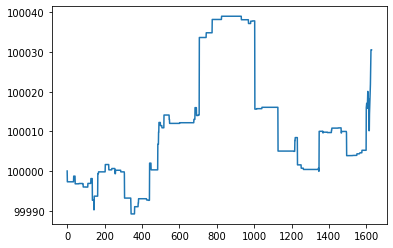

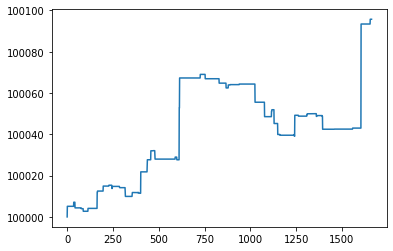

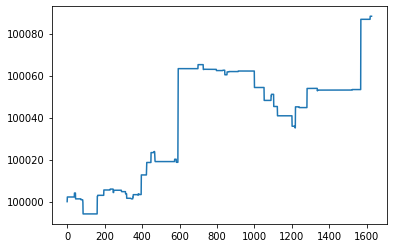

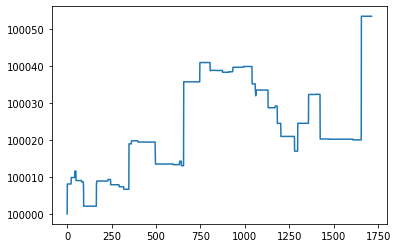

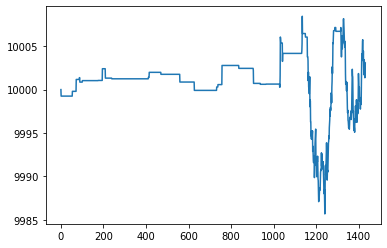

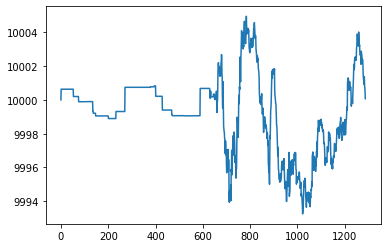

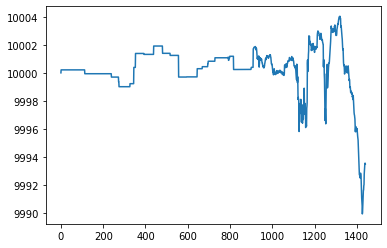

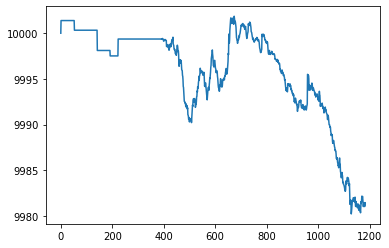

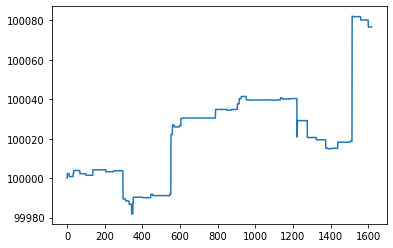

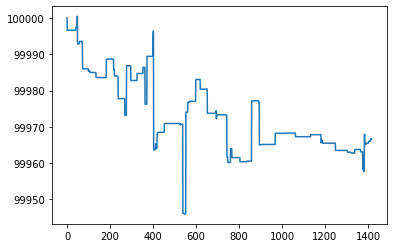

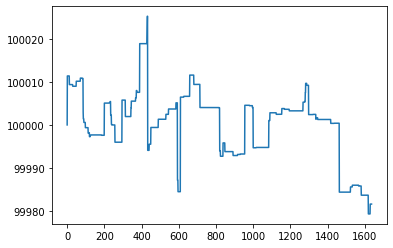

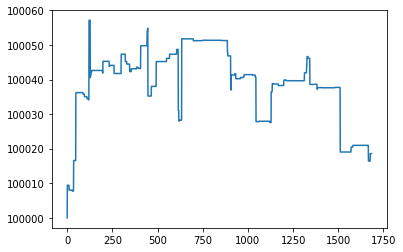

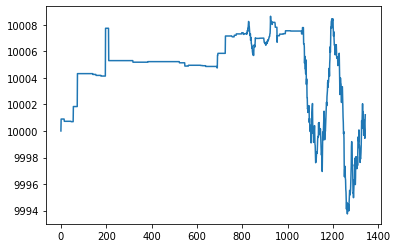

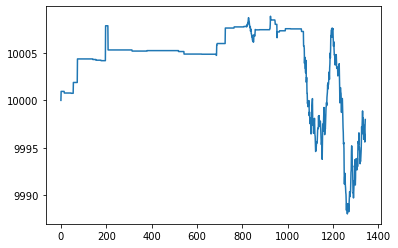

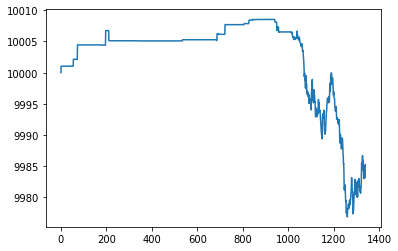

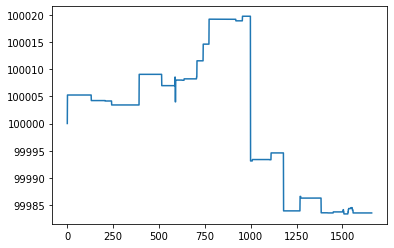

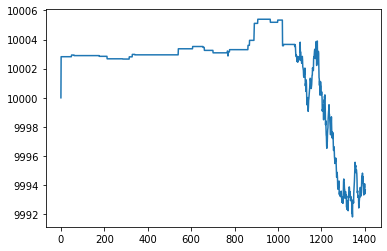

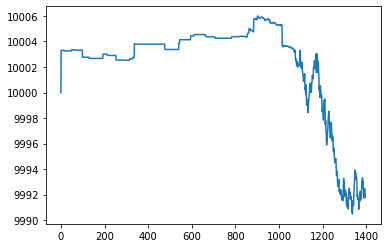

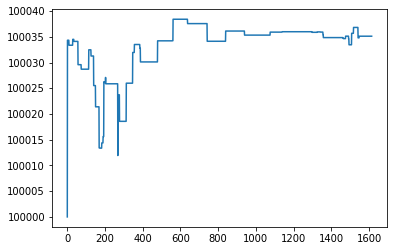

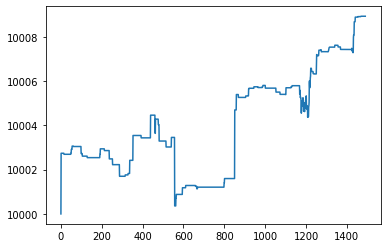

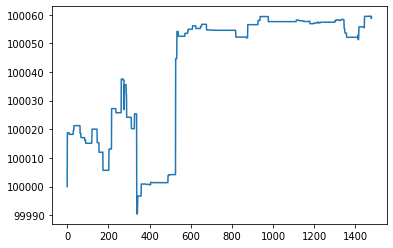

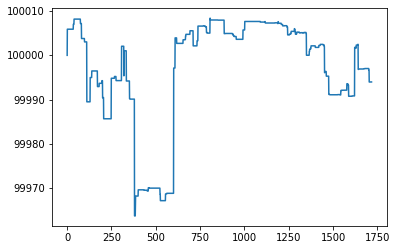

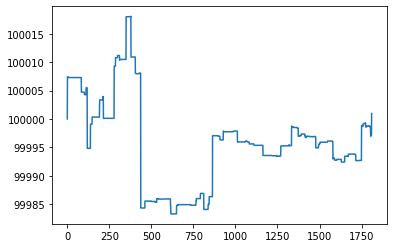

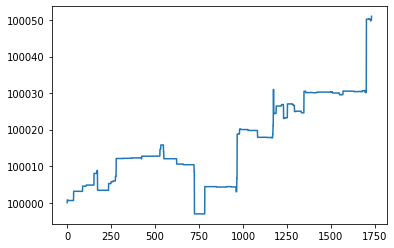

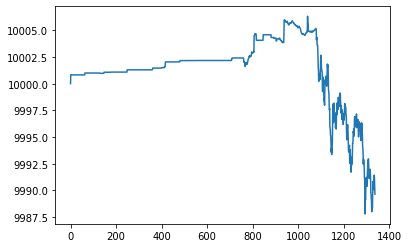

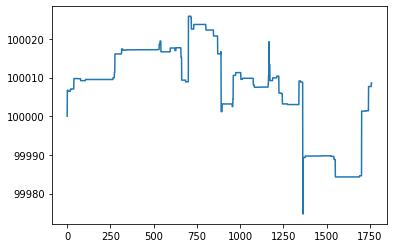

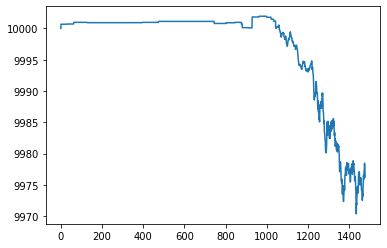

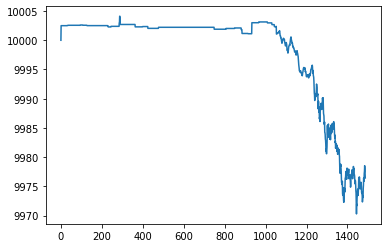

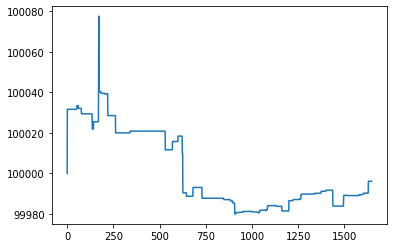

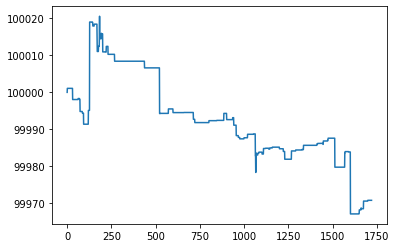

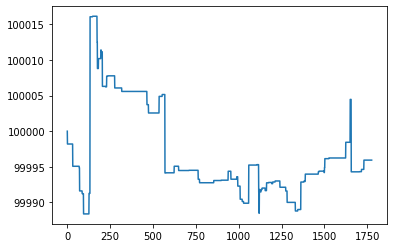

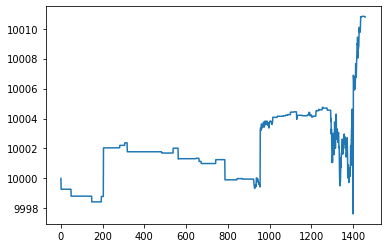

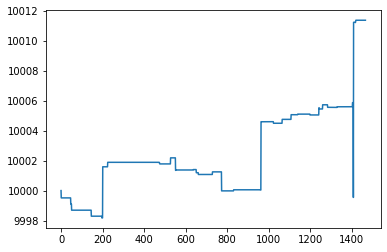

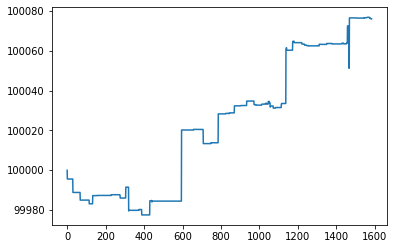

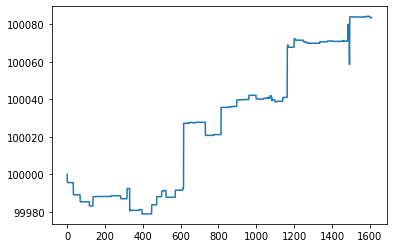

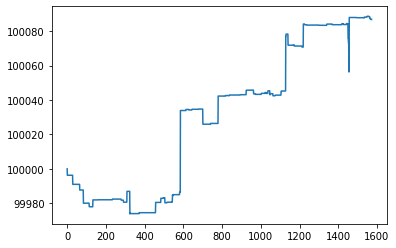

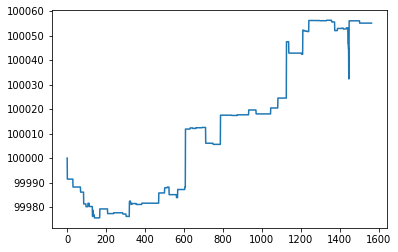

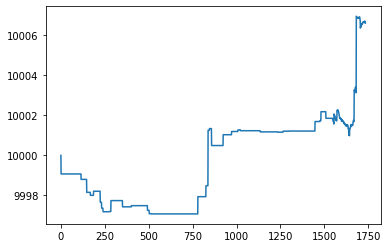

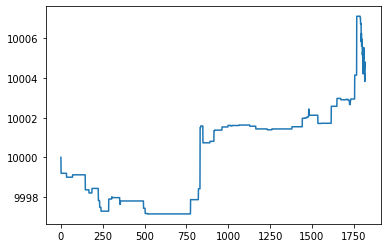

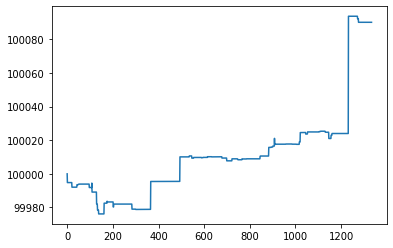

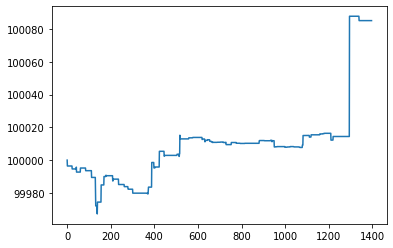

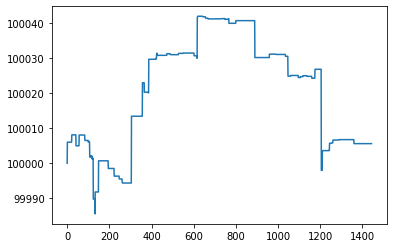

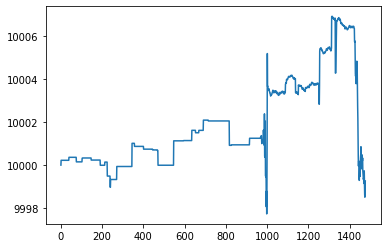

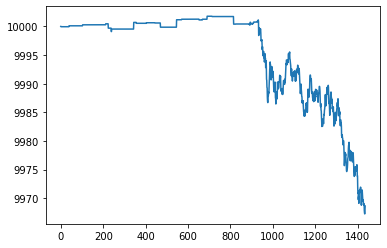

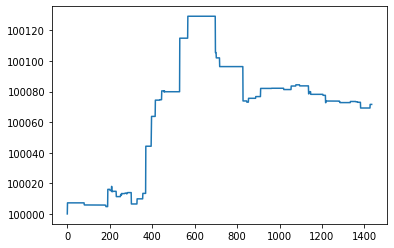

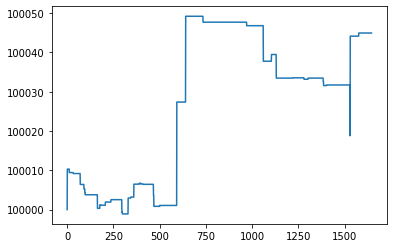

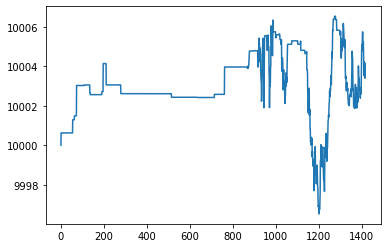

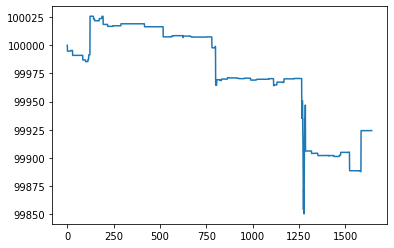

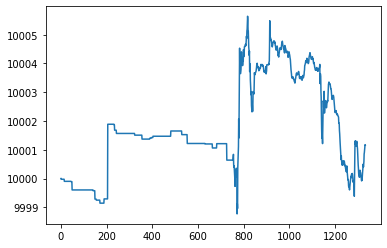

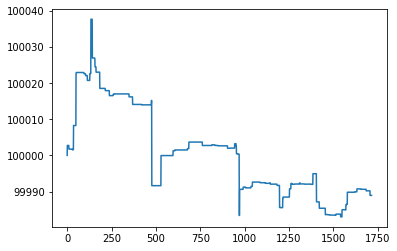

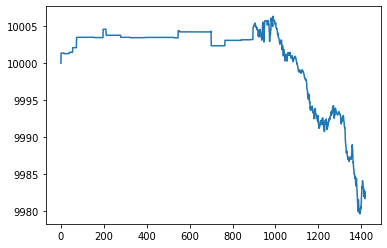

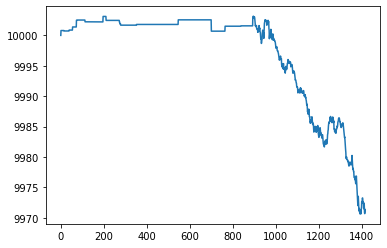

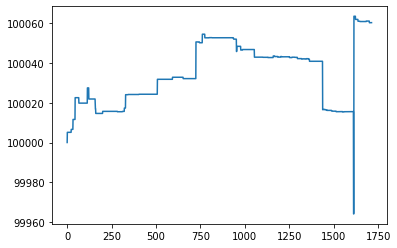

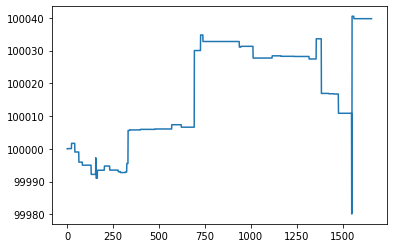

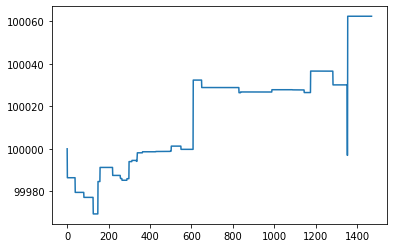

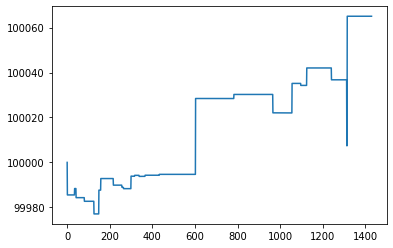

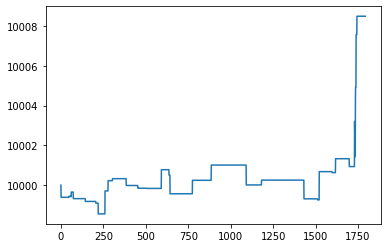

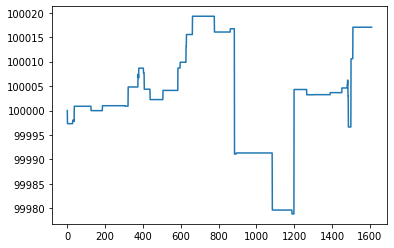

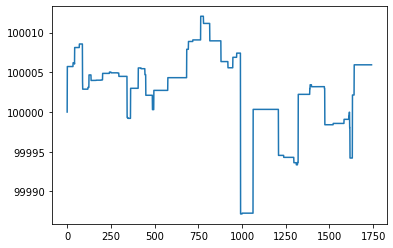

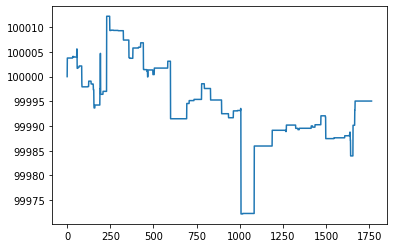

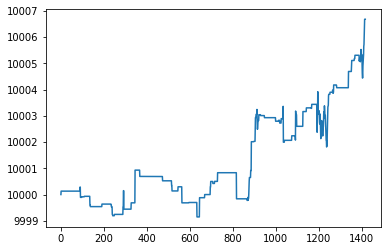

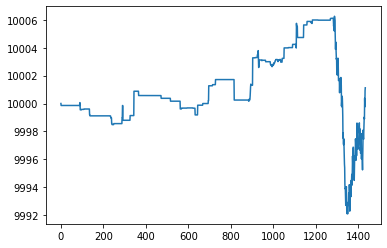

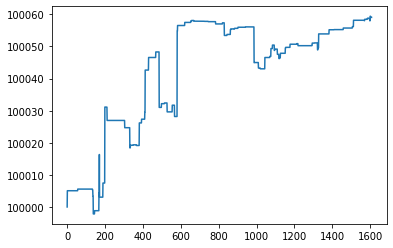

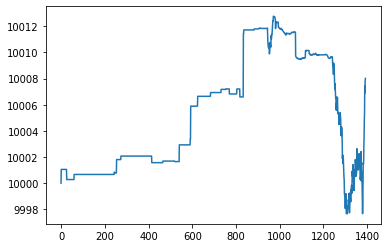

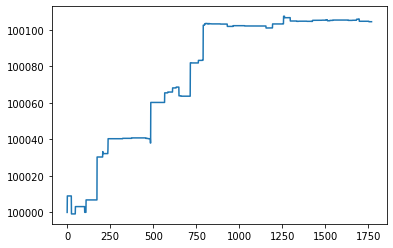

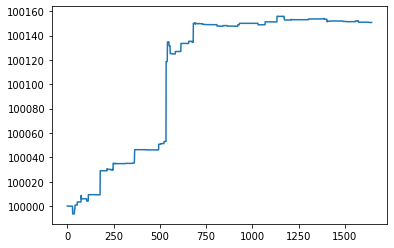

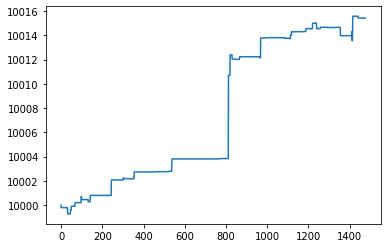

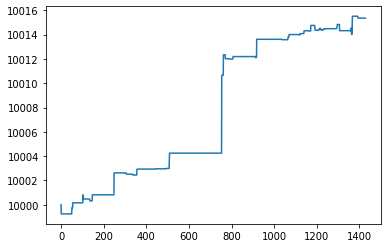

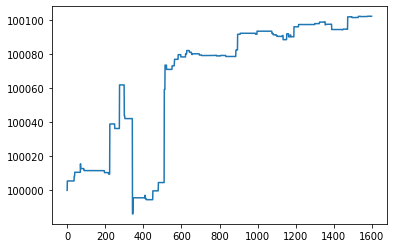

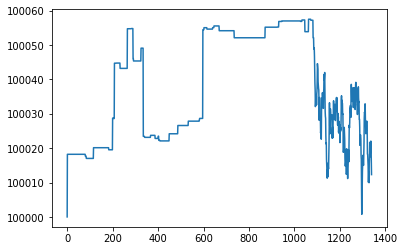

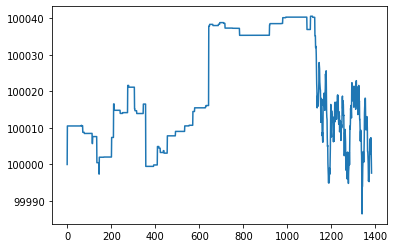

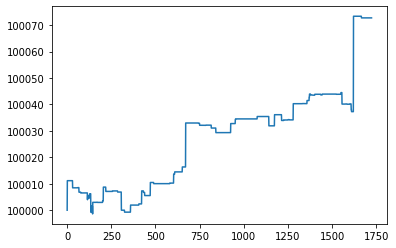

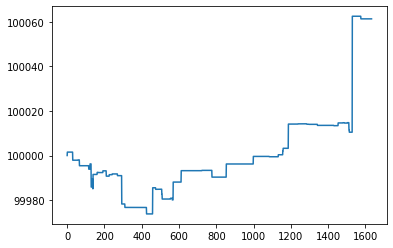

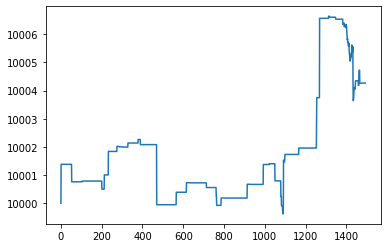

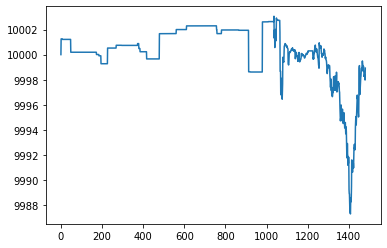

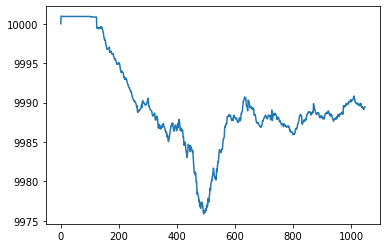

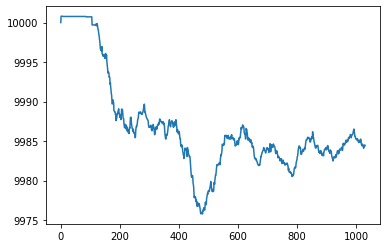

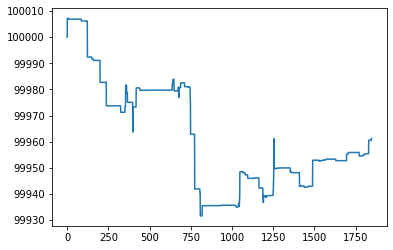

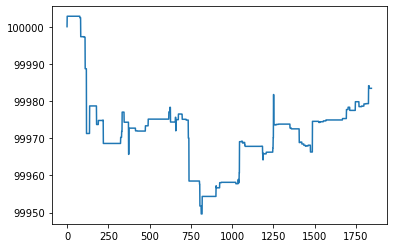

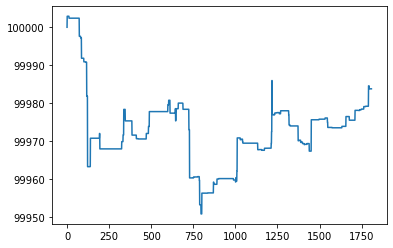

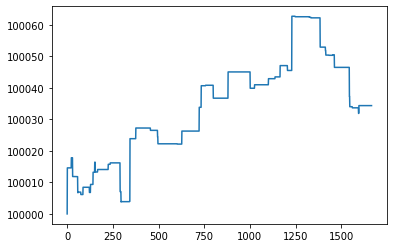

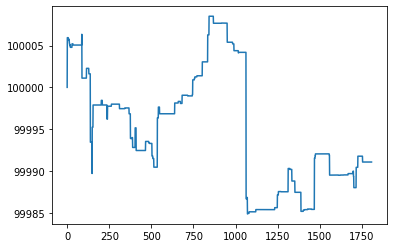

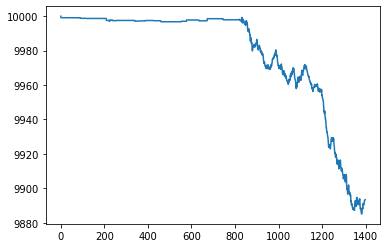

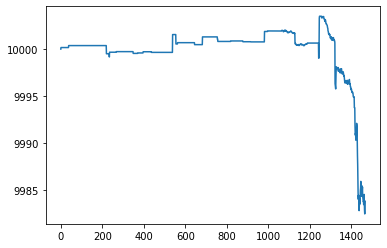

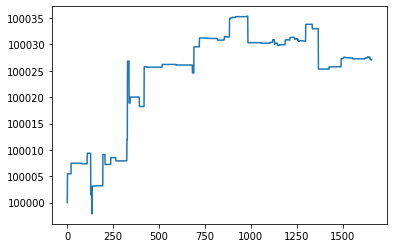

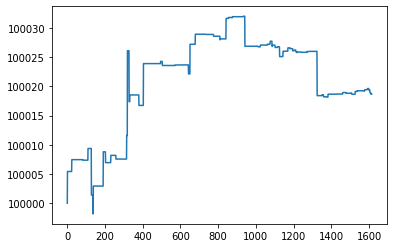

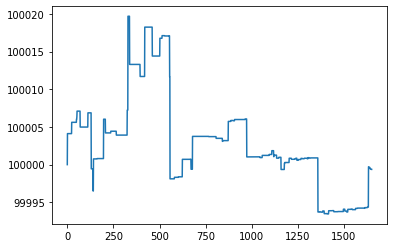

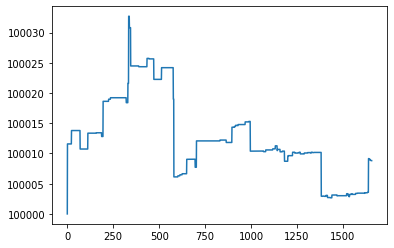

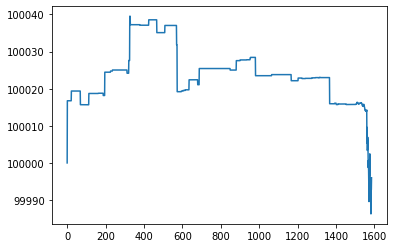

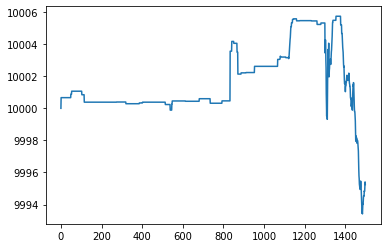

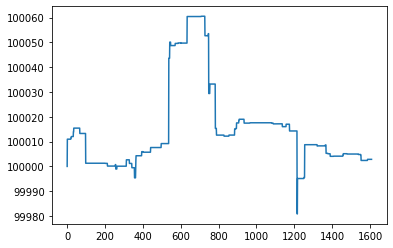

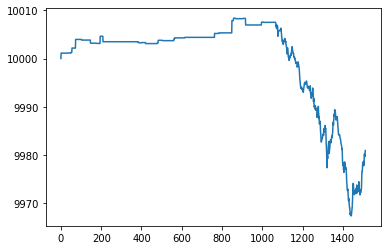

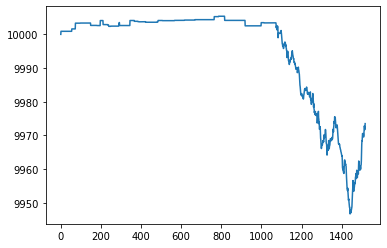

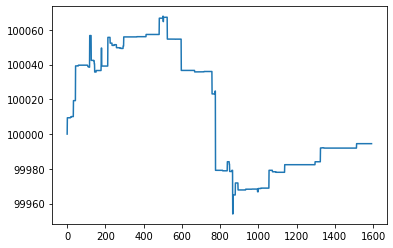

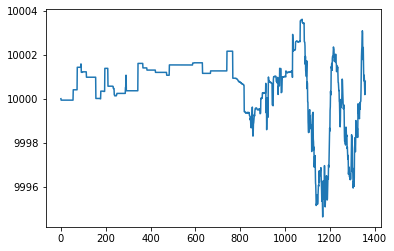

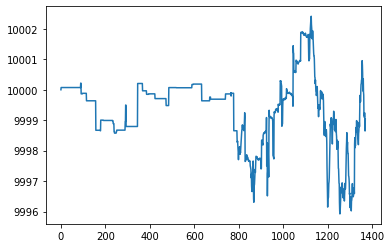

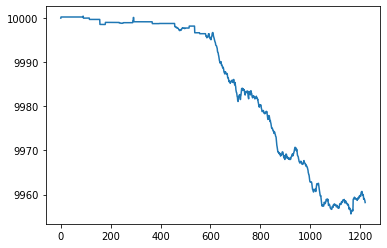

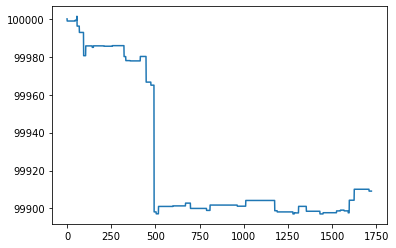

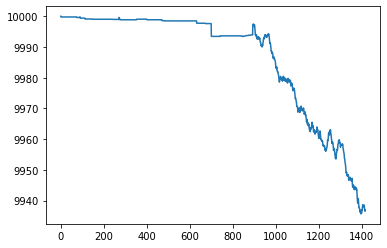

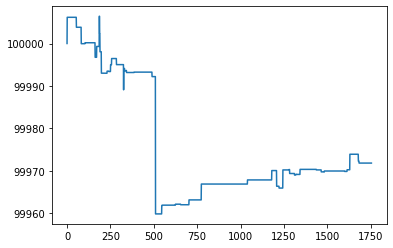

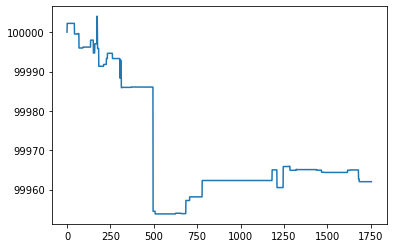

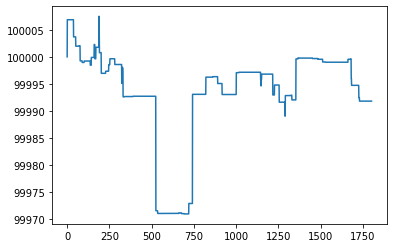

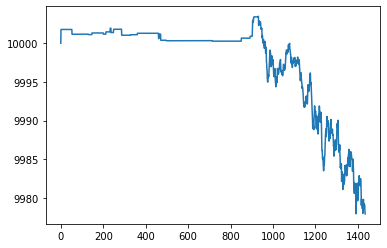

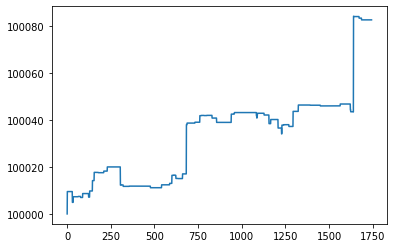

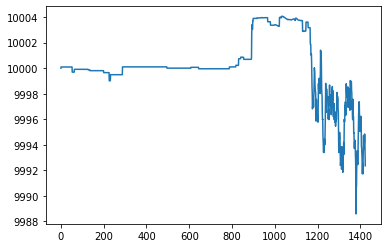

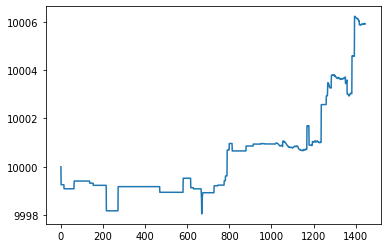

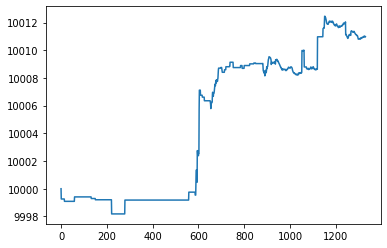

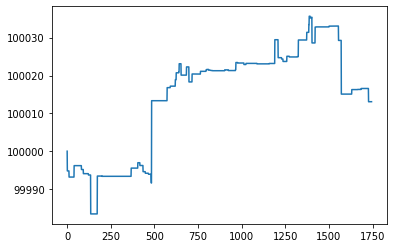

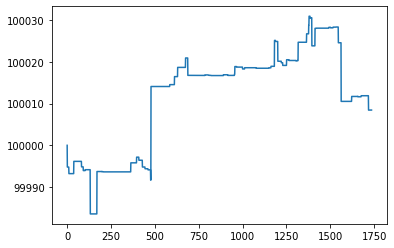

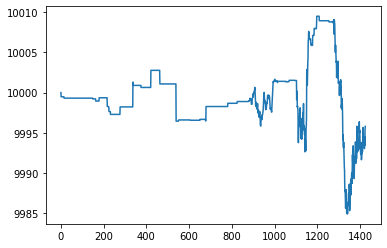

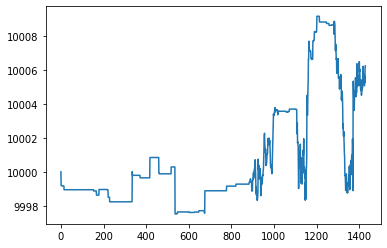

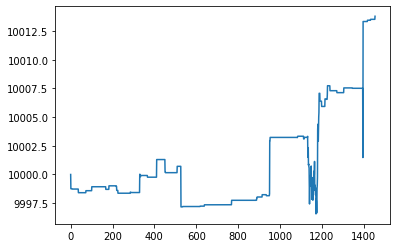

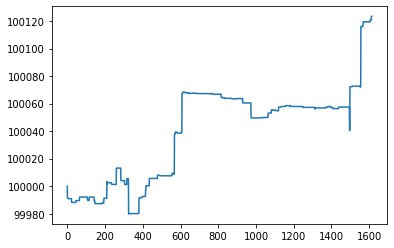

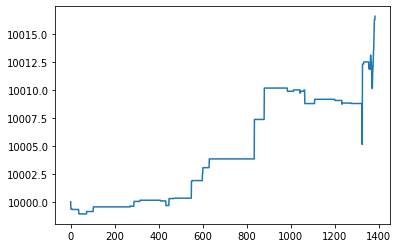

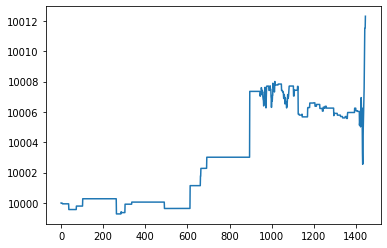

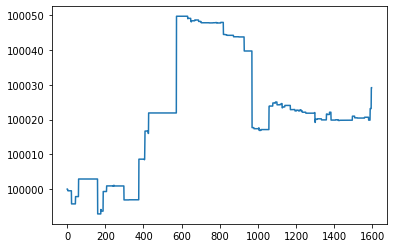

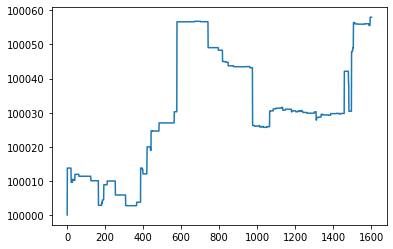

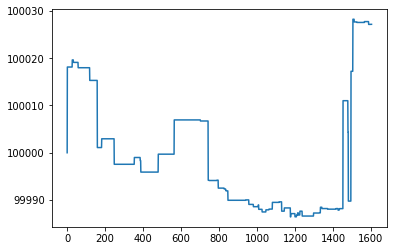

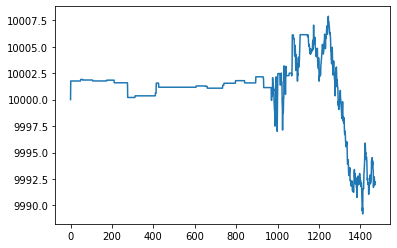

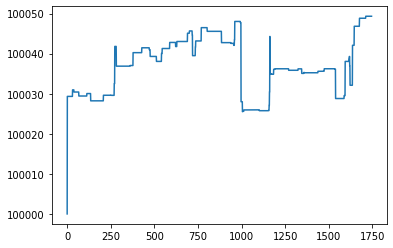

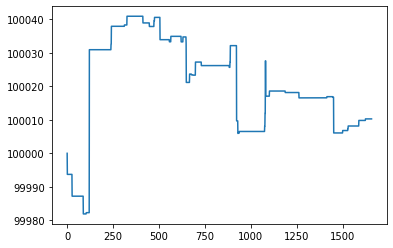

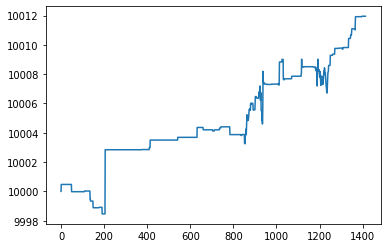

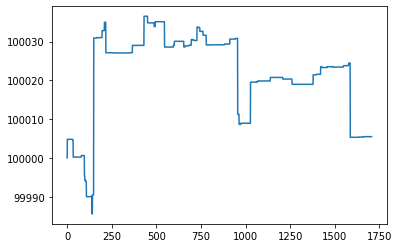

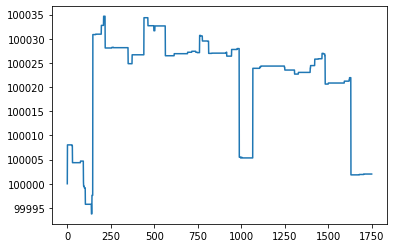

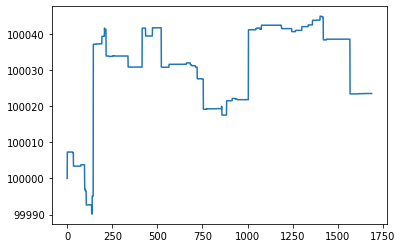

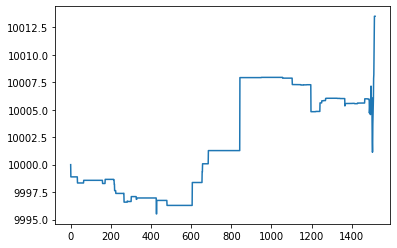

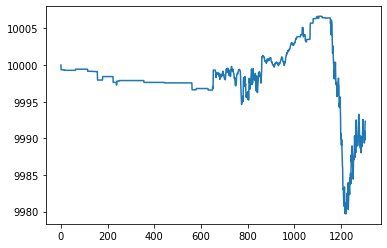

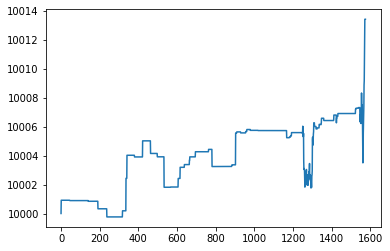

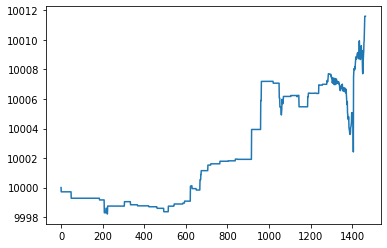

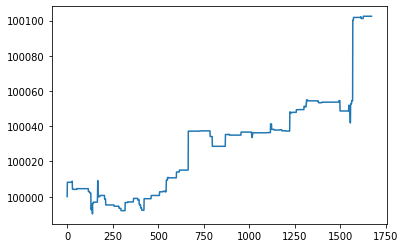

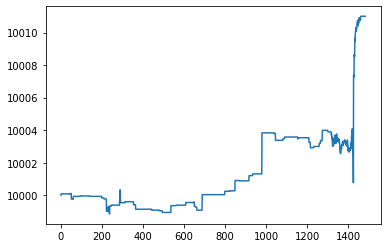

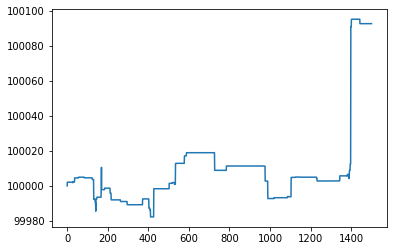

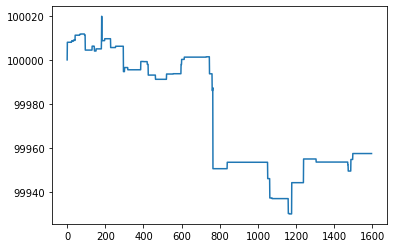

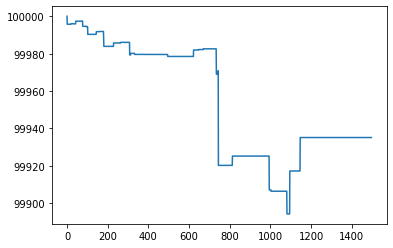

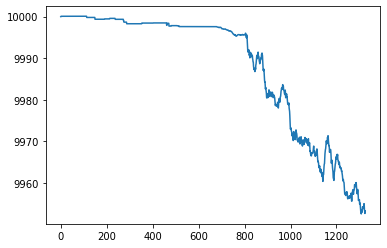

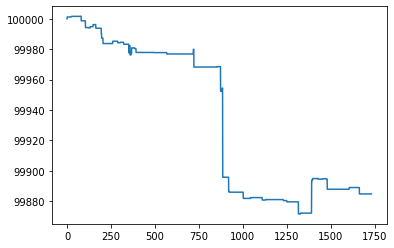

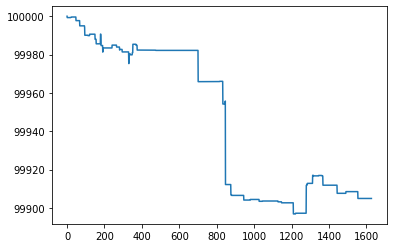

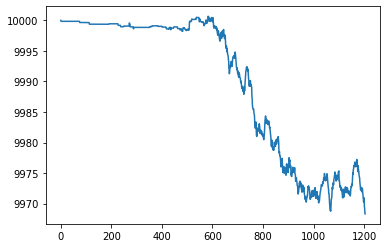

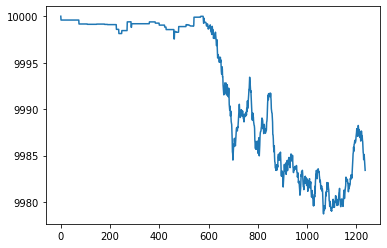

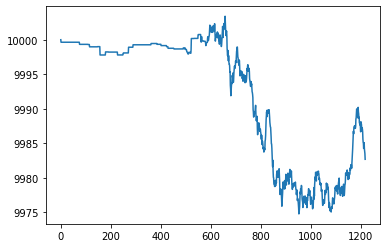

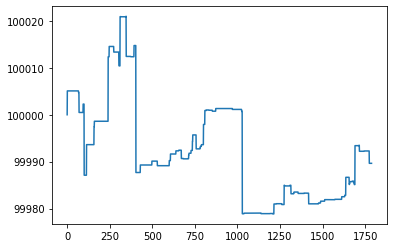

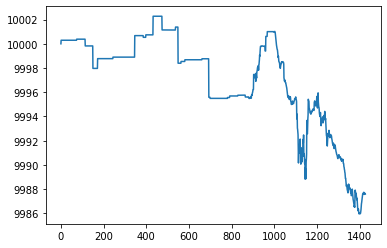

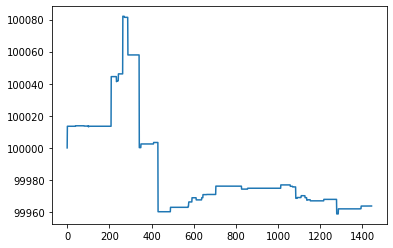

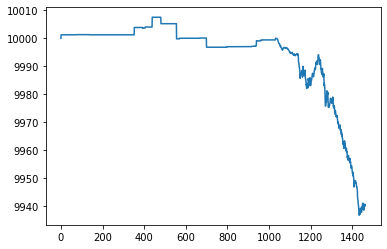

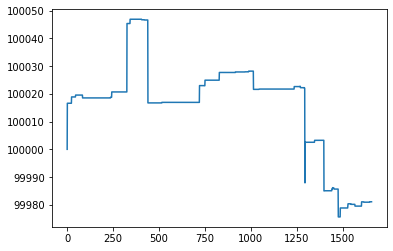

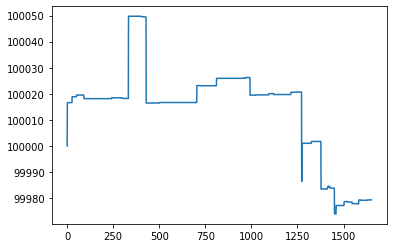

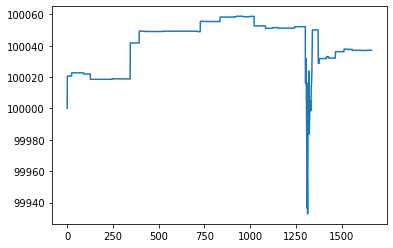

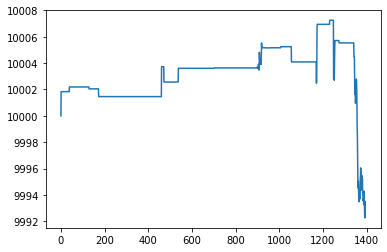

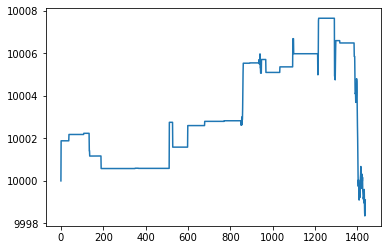

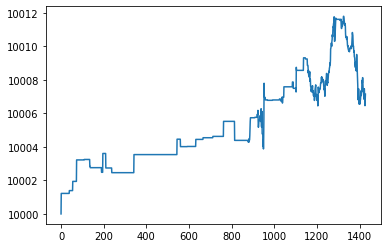

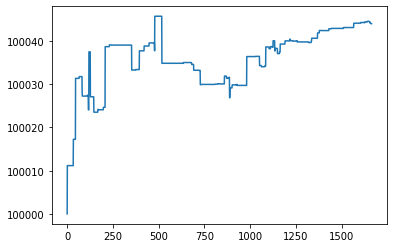

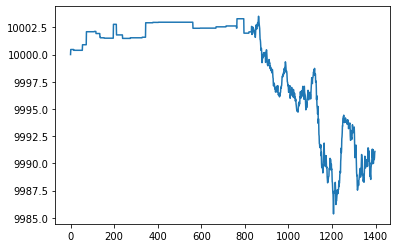

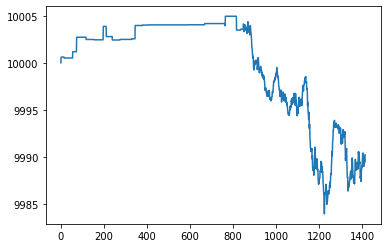

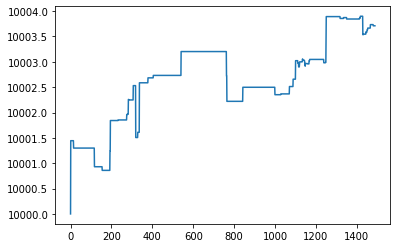

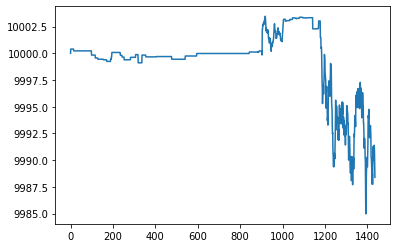

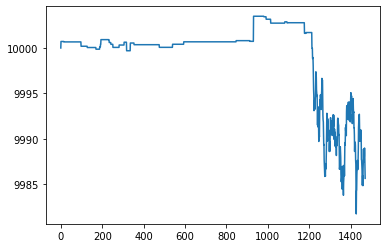

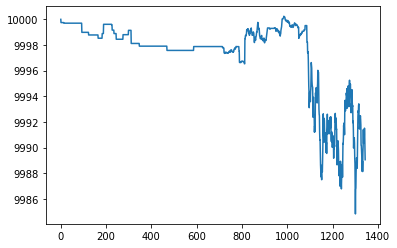

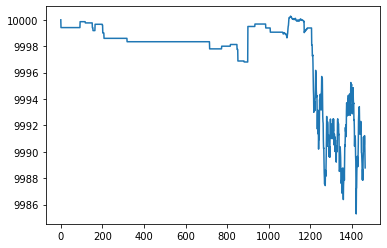

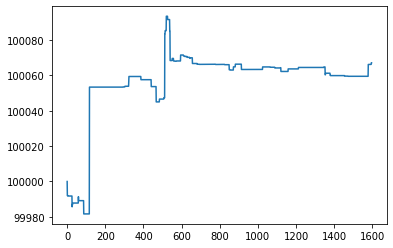

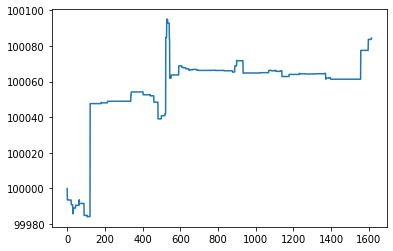

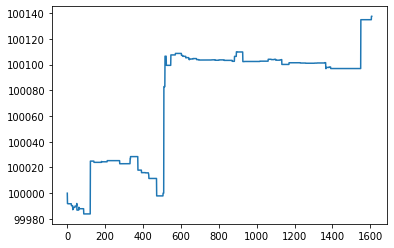

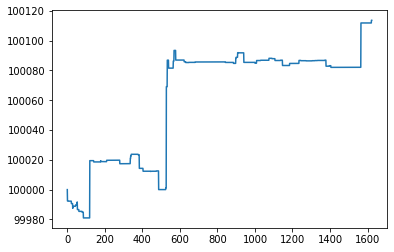

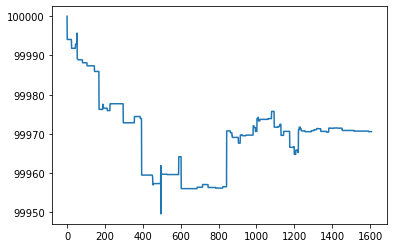

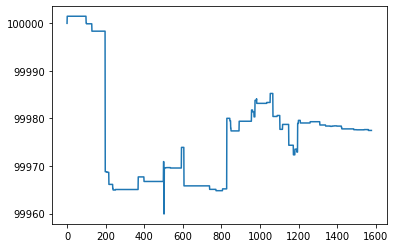

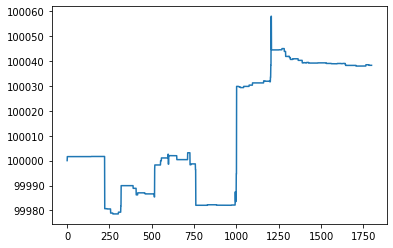

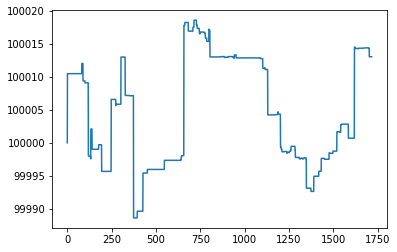

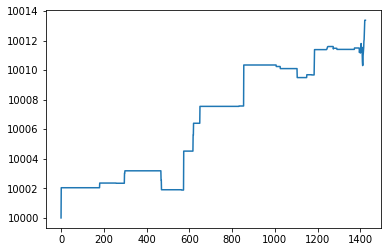

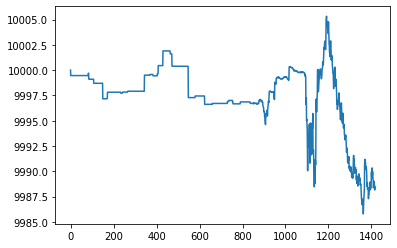

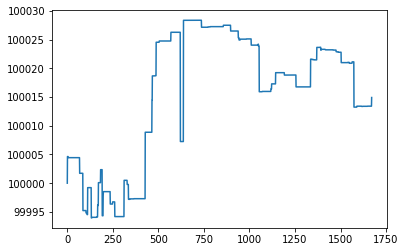

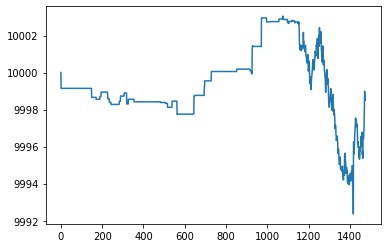

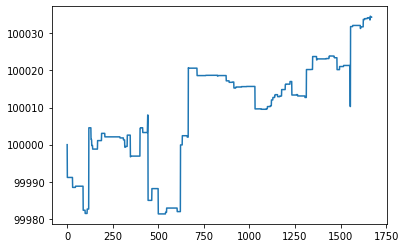

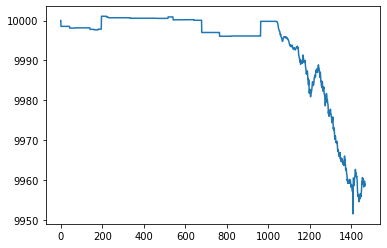

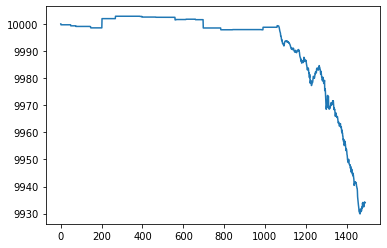

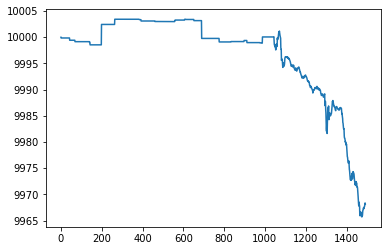

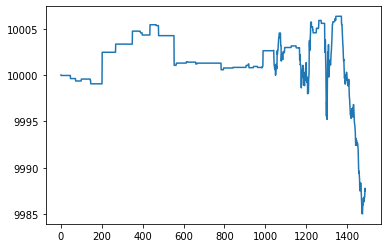

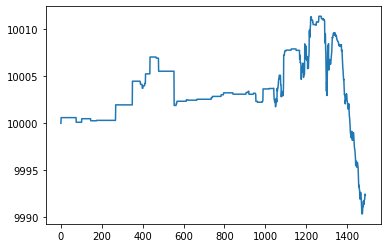

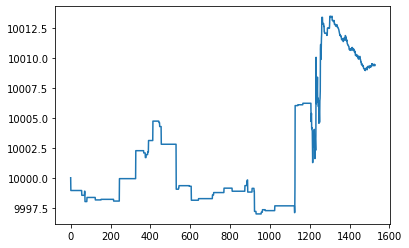

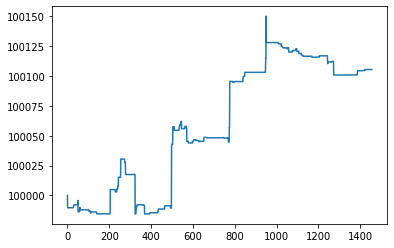

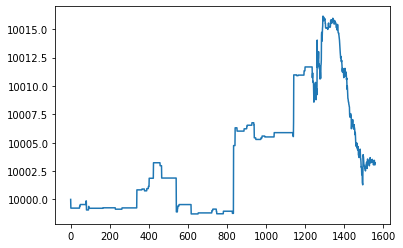

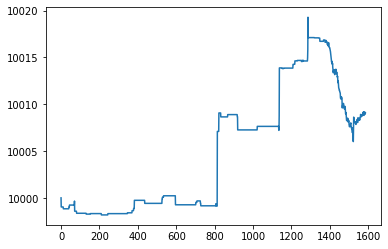

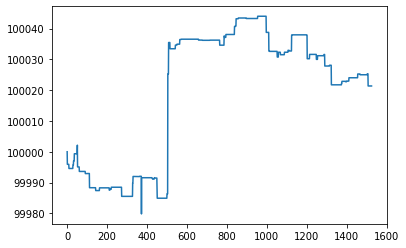

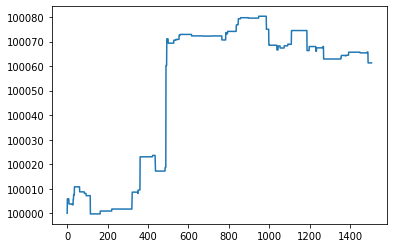

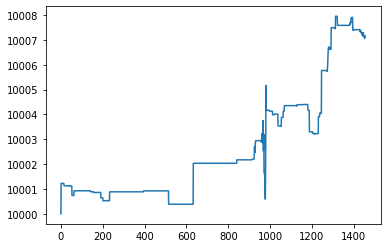

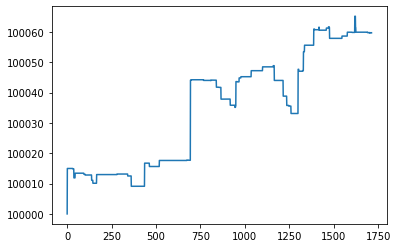

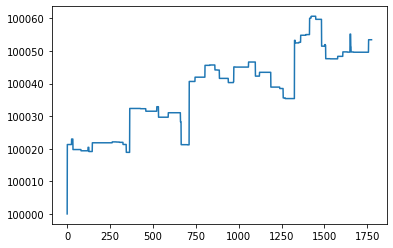

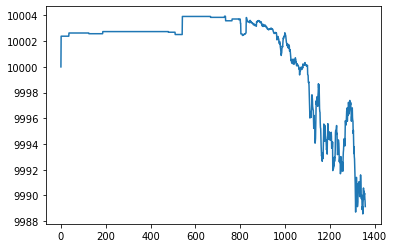

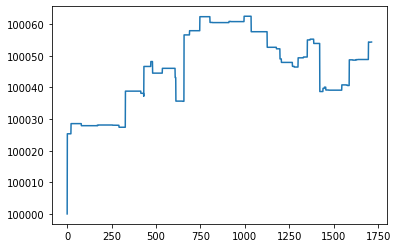

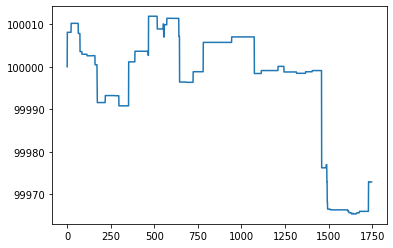

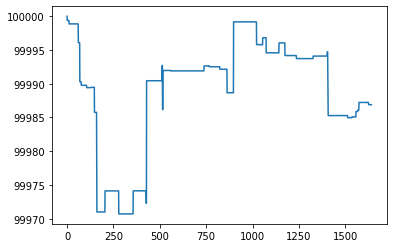

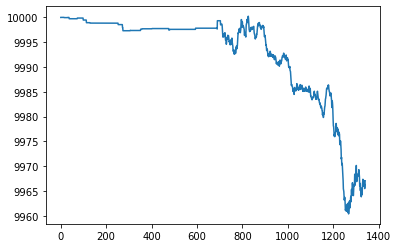

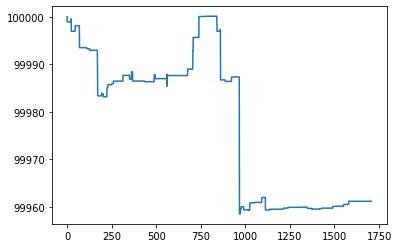

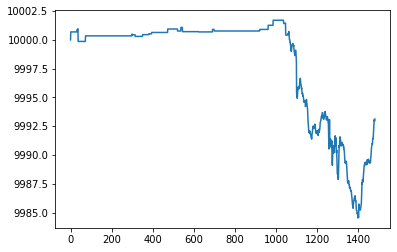

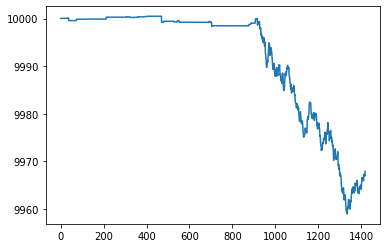

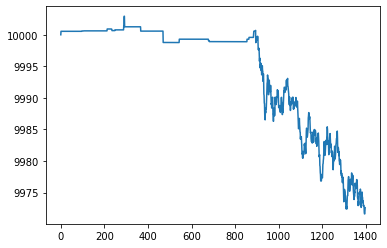

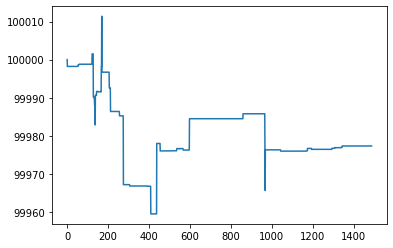

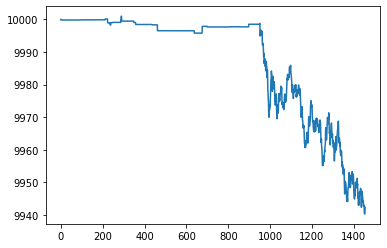

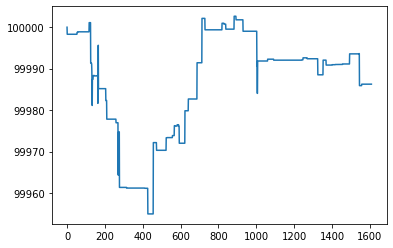

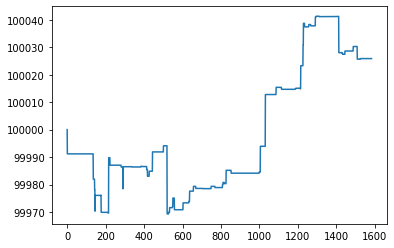

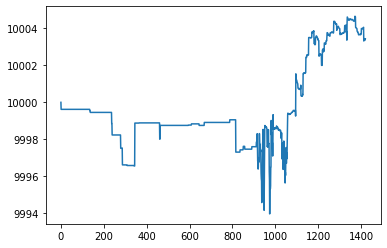

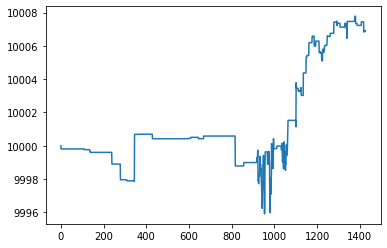

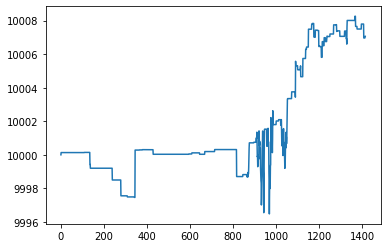

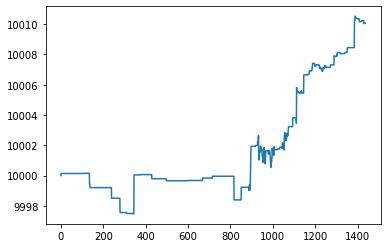

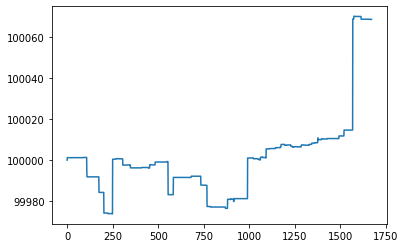

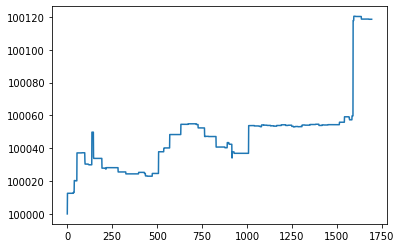

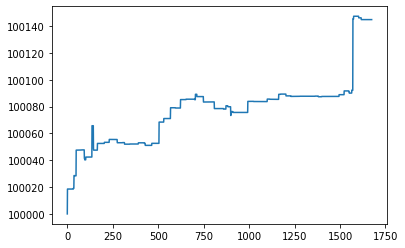

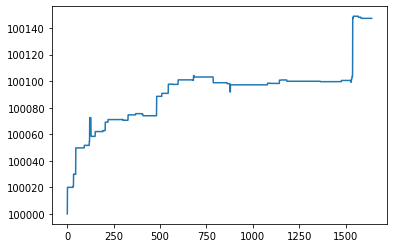

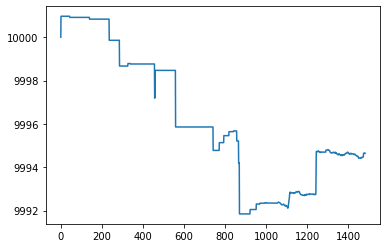

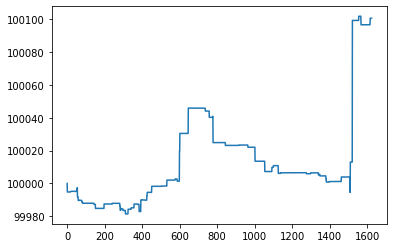

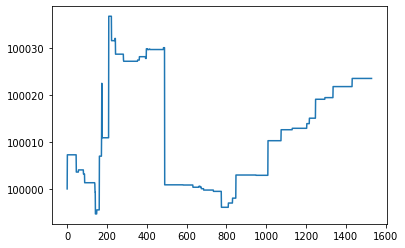

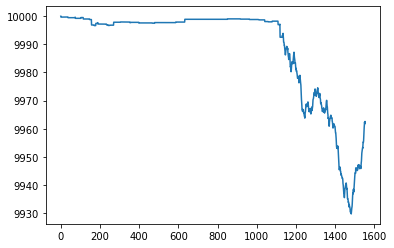

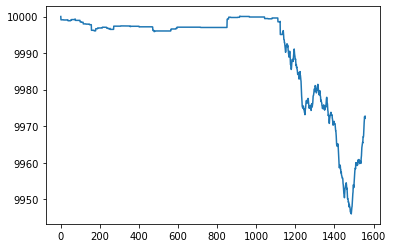

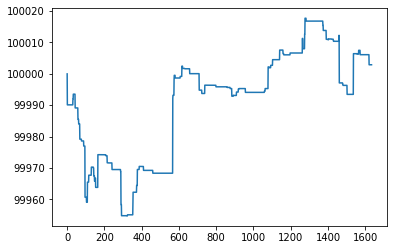

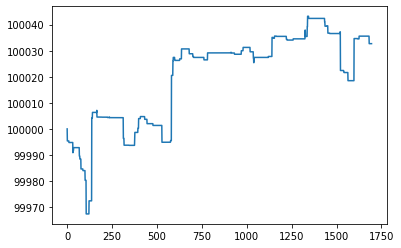

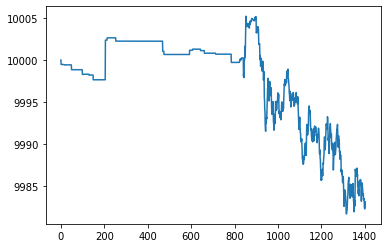

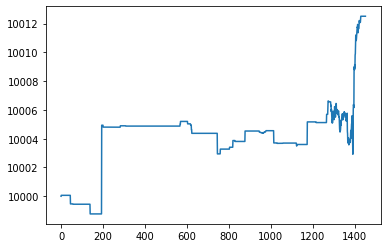

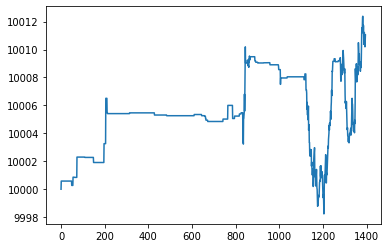

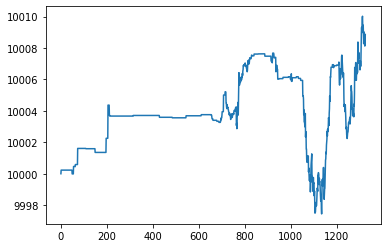

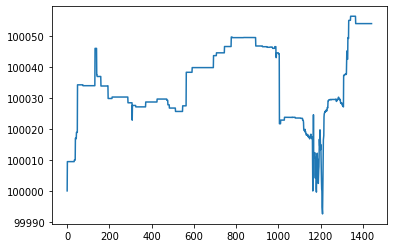

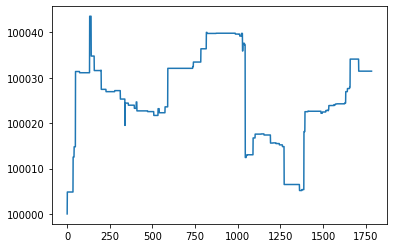

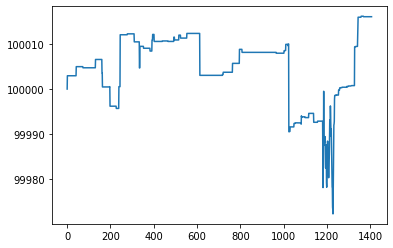

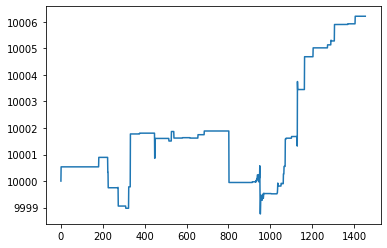

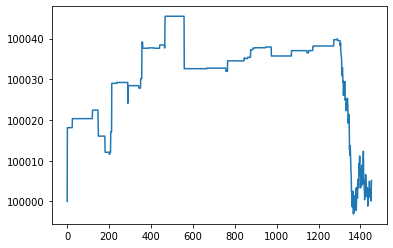

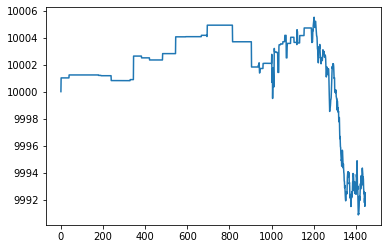

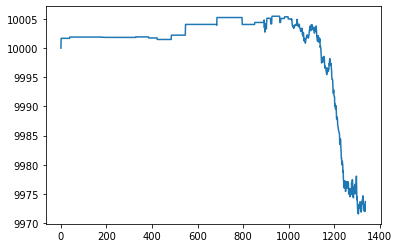

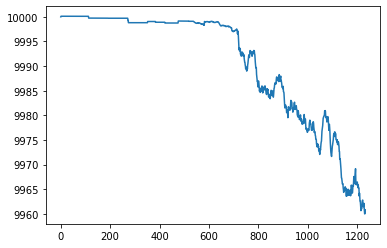

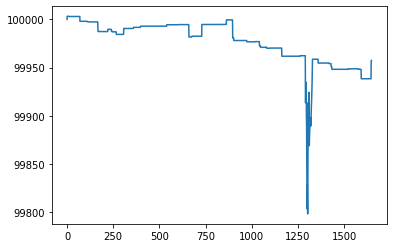

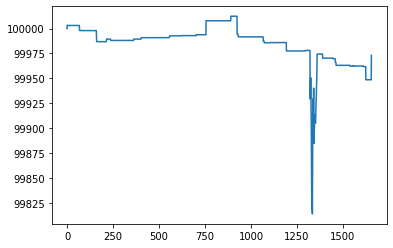

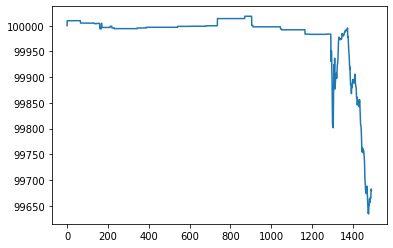

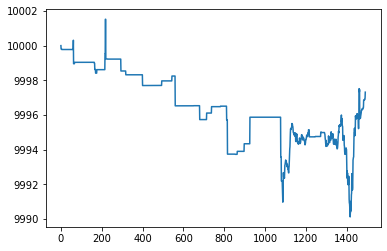

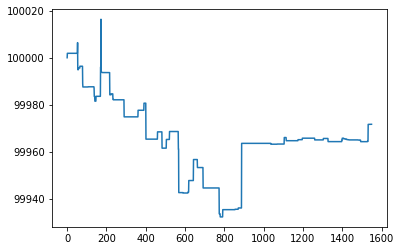

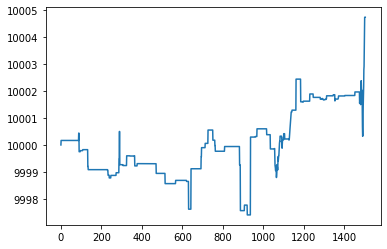

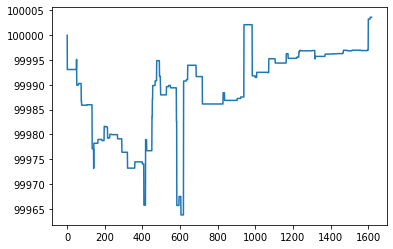

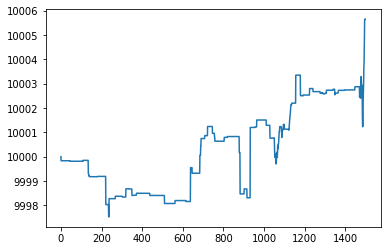

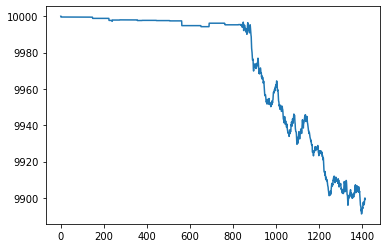

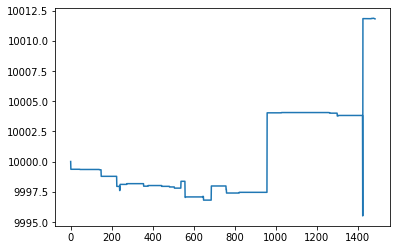

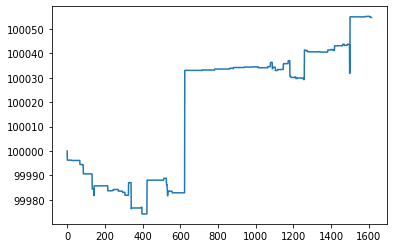

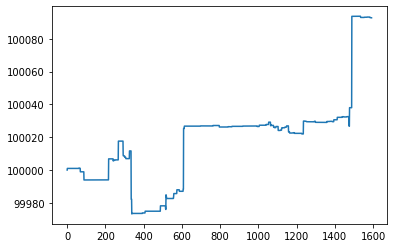

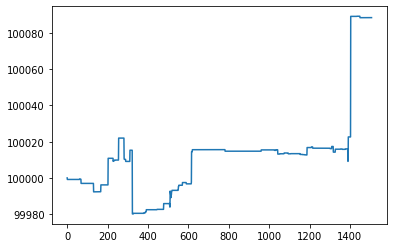

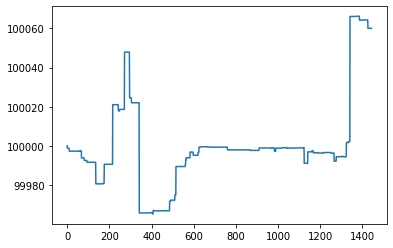

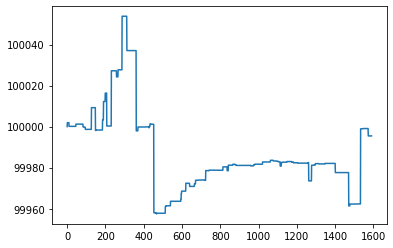

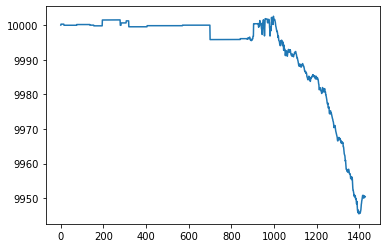

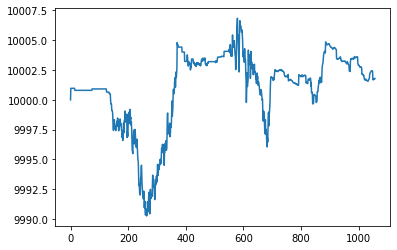

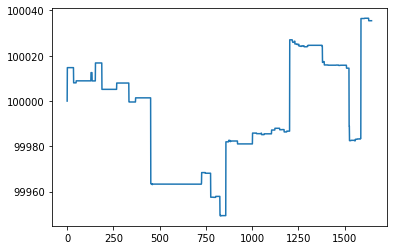

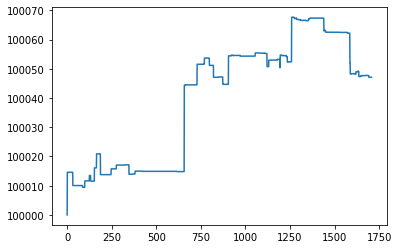

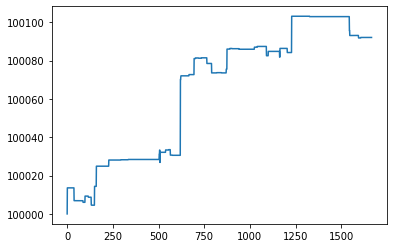

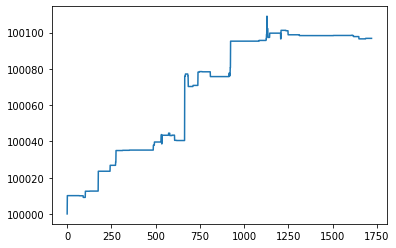

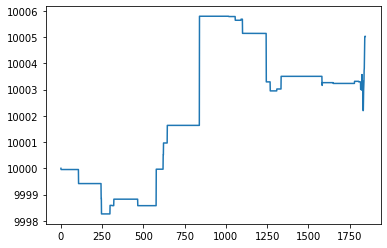

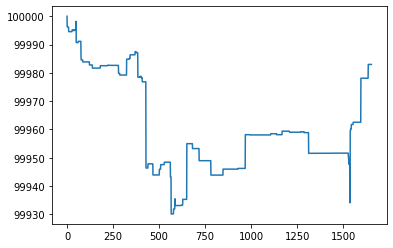

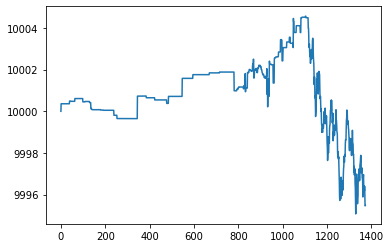

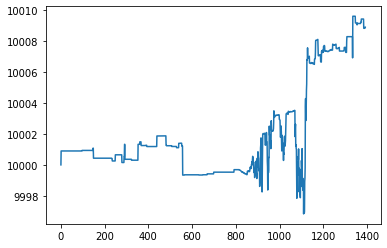

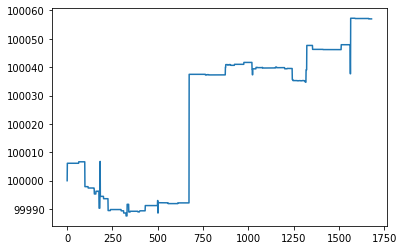

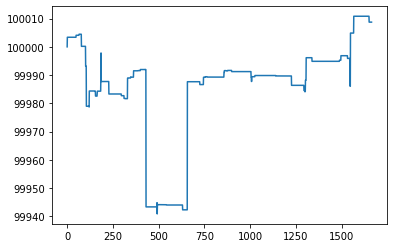

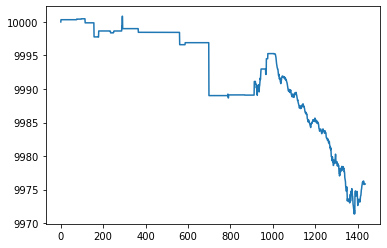

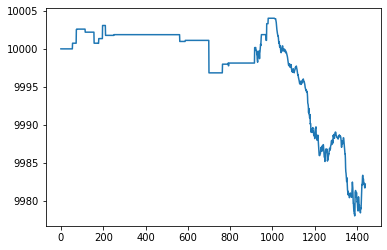

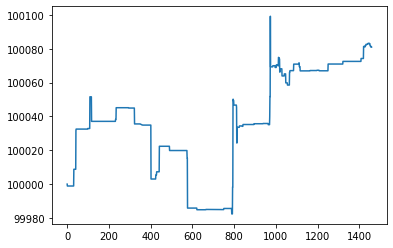

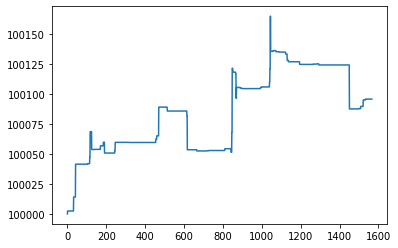

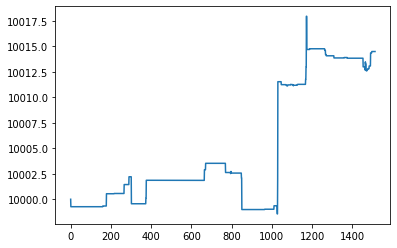

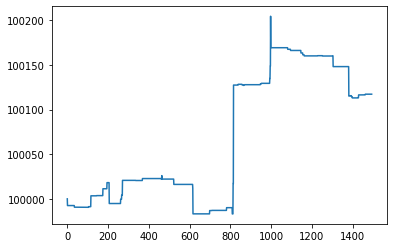

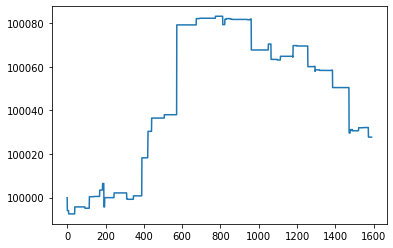

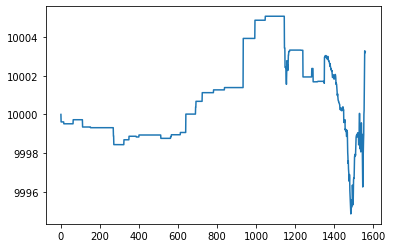

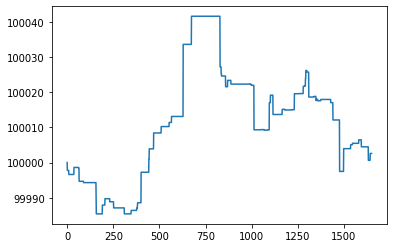

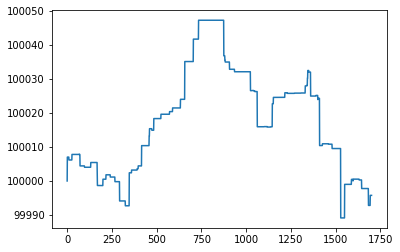

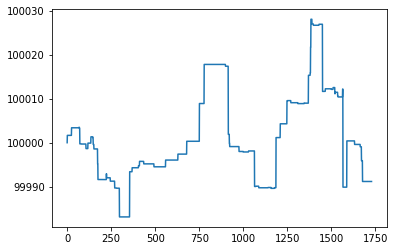

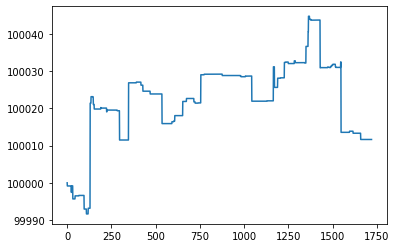

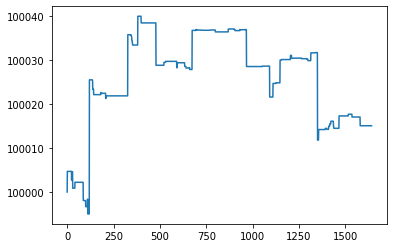

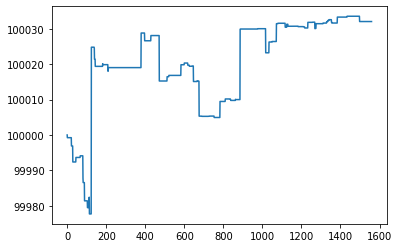

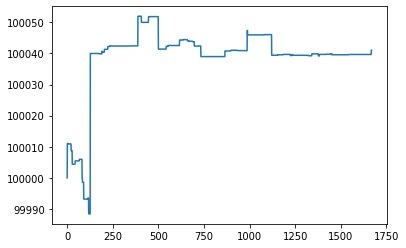

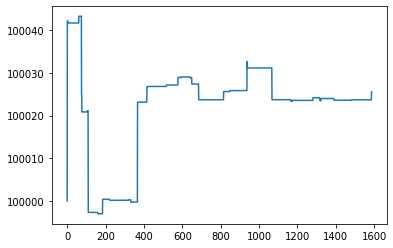

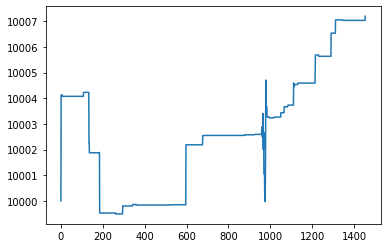

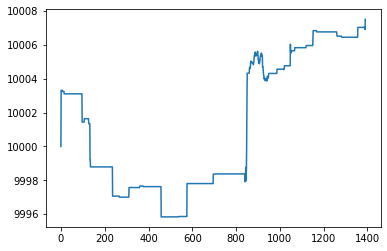

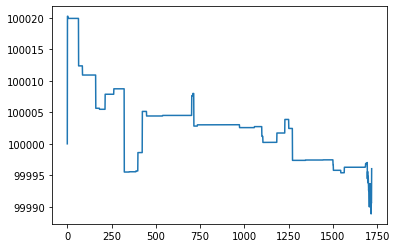

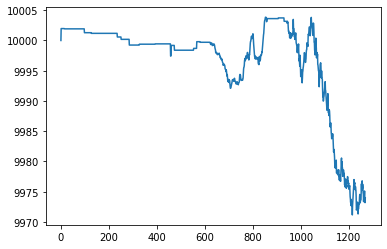

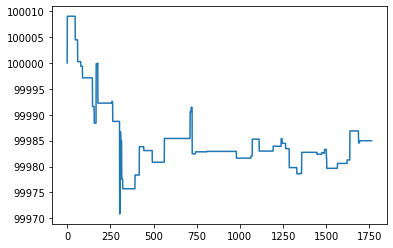

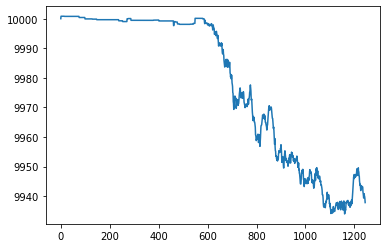

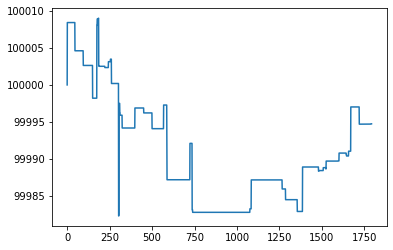

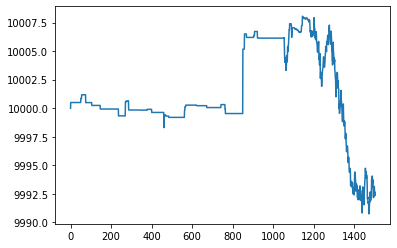

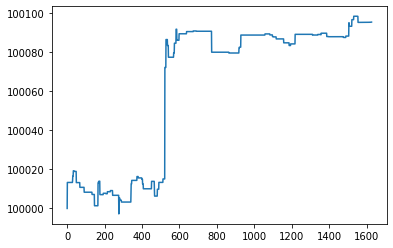

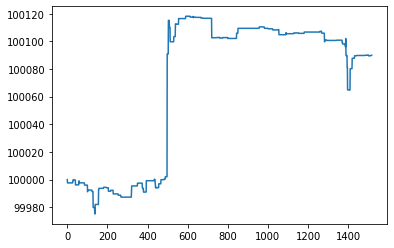

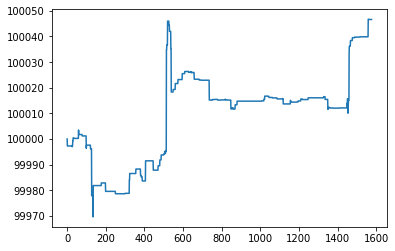

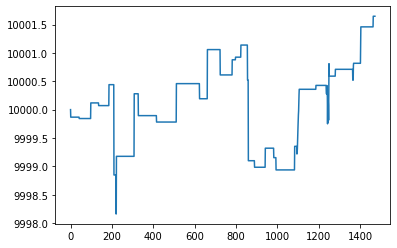

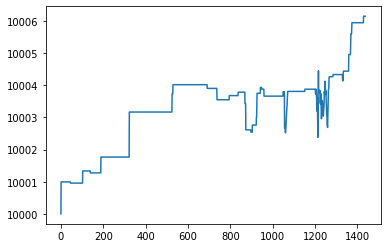

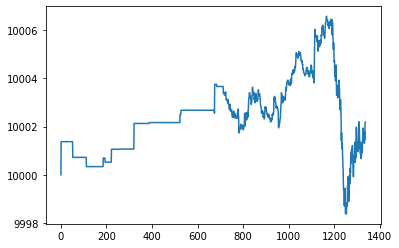

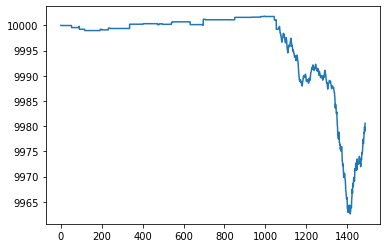

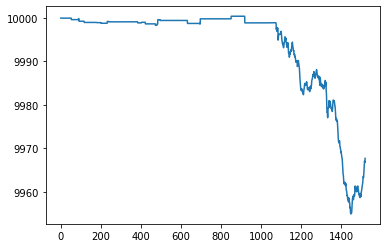

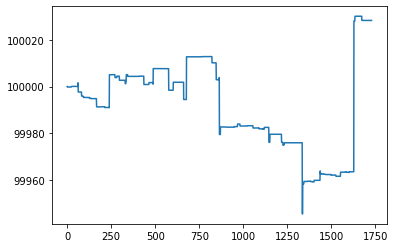

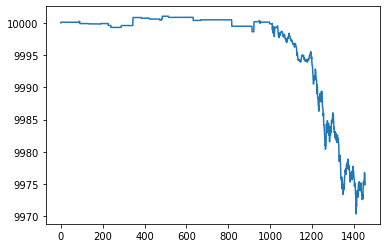

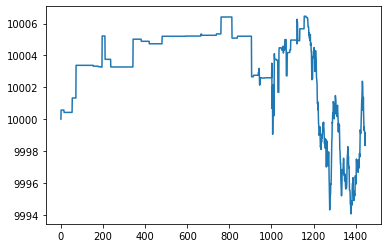

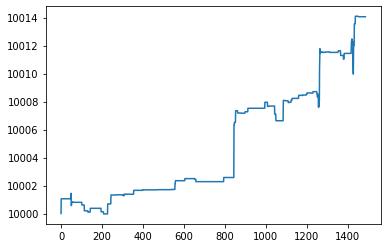

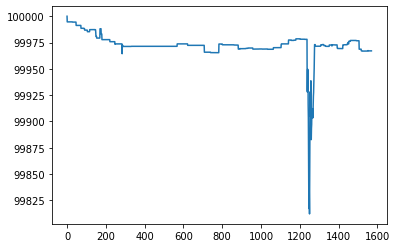

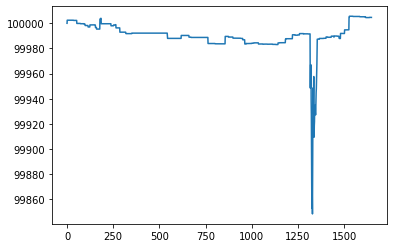

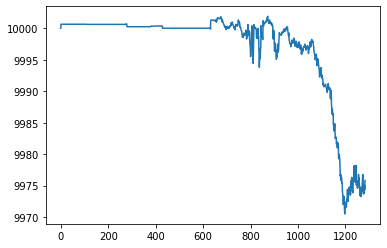

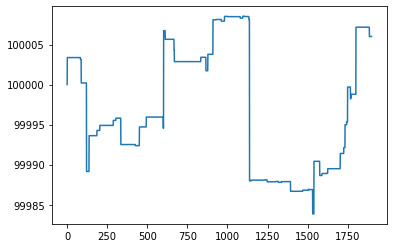

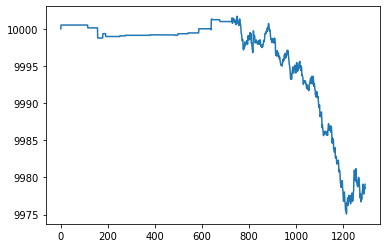

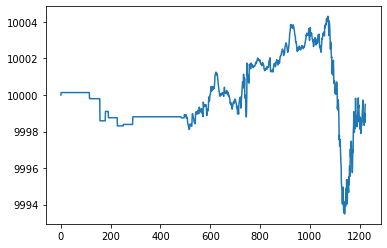

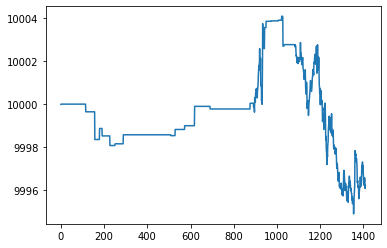

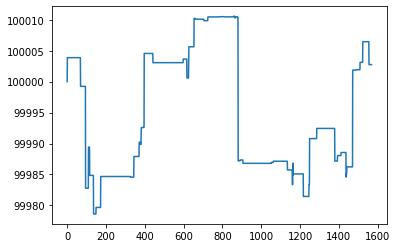

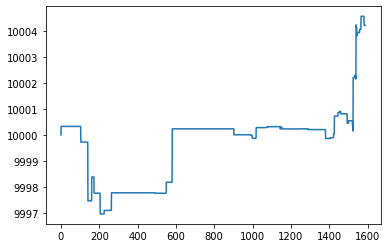

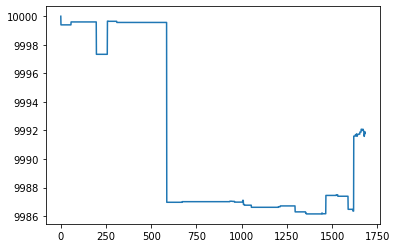

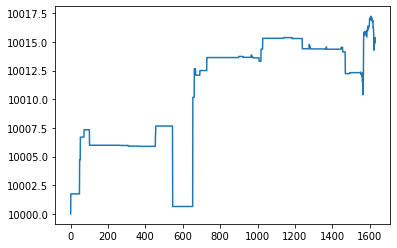

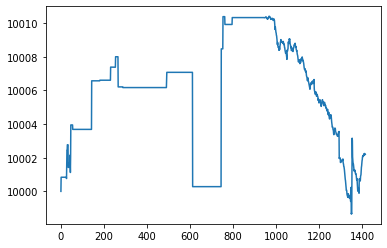

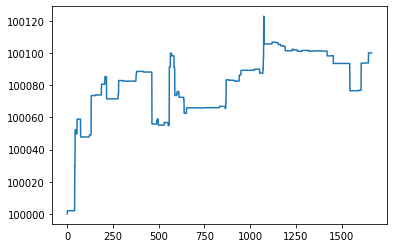

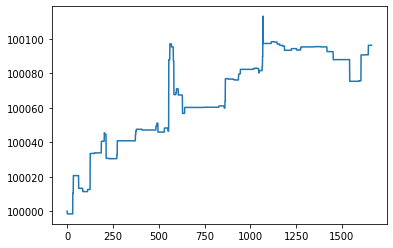

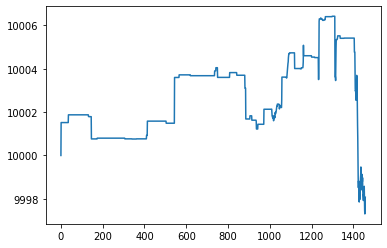

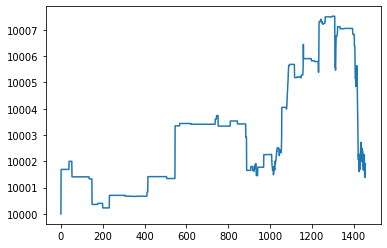

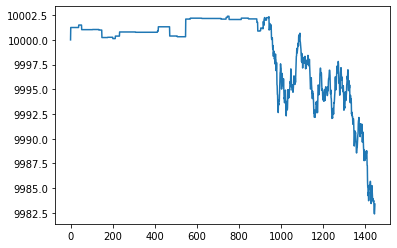

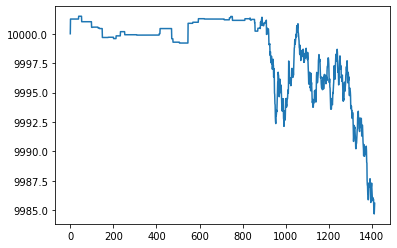

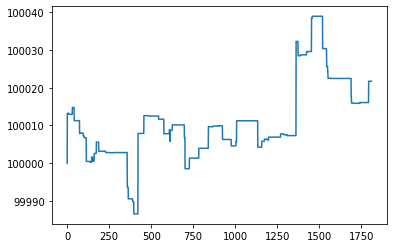

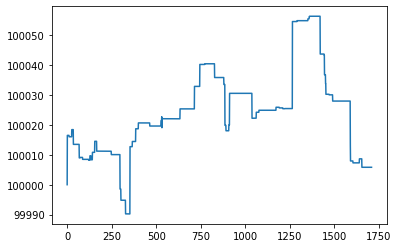

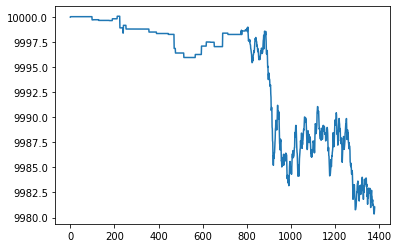

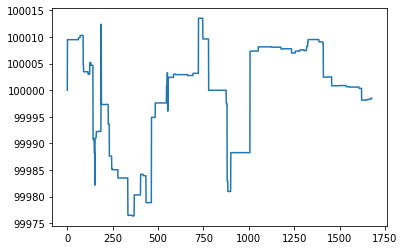

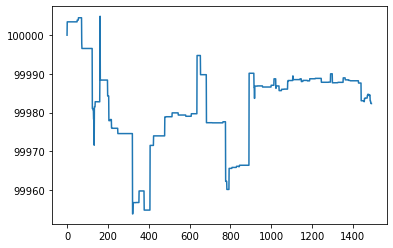

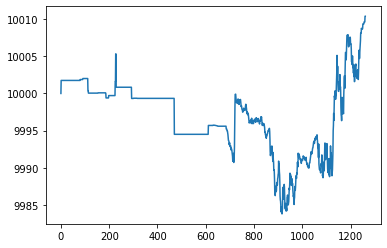

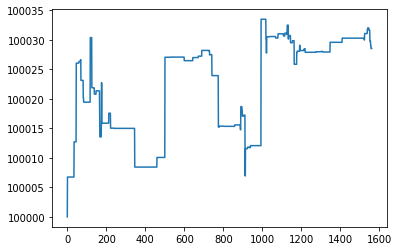

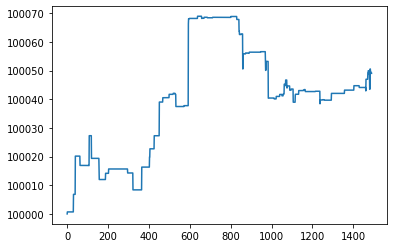

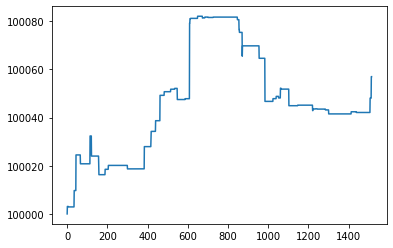

In [39]:
for portfID, portf in traderIDs.items():
# #     plt.plot(np.arange(len(portf.sharpeReal)),portf.sharpeReal, color='blue')
# #     plt.plot(np.arange(len(portf.sharpeOpt)),portf.sharpeOpt, color='red')
# #     print(len(portf.sharpeReal))
# #     plt.plot(np.arange(len(portf.sharpeReal)), portf.sharpeReal)
# #     plt.plot(np.arange(len(portf.sharpeOpt)),portf.sharpeOpt)
#     print(portfID)
    plt.plot(np.arange(len(portf.value)),portf.value)
    plt.ticklabel_format(useOffset=False)
    plt.show()

In [9]:
TtotalOrders[:40]

time portfolio  stock  order
0    993     taukg      6   -1.0
1    993     taukg     10    1.0
2    993     taukg     11   -1.0
3    993     pbqeg     10    1.0
4    993     pbqeg     13   -1.0
5    993     glwjd     10    2.0
6    993     glwjd     11    1.0
7    993     glwjd     14   -2.0
8    993     oinxb     10   11.0
9    993     oinxb     11    8.0
10   993     oinxb     13   -5.0
11   993     oinxb     14  -11.0
12   993     oinxb     15    8.0
13   993     oinxb     18    3.0
14   993     oinxb     19  -14.0
15   993     oinxb     20    3.0
16   993     thdyr     13   -1.0
17   993     thdyr     14   -1.0
18   993     thdyr     15    2.0
19   993     thdyr     18    1.0
20   993     thdyr     19   -1.0
21   993     thdyr     20    1.0
22   993     gwszt     15    2.0
23   993     gwszt     18    1.0
24   993     gwszt     19   -3.0
25   993     gwszt     20    1.0
26   993     gwszt     24    2.0
27   993     mbgpx     19  -20.0
28   993     mbgpx     20   17.0
29   993     mbgpx     24   35.0
30   993     mbgpx     25   -5.0
31   993     rokuj     24   95.0
32   993     rokuj     25  -28.0
33   993     rokuj     28  -14.0
34   993     rdjzh     31    1.0
35   993     rdjzh     32   -1.0
36   993     nadfv     28   -1.0
37   993     nadfv     30    1.0
38   993     nadfv     31    3.0
39   993     nadfv     32  -12.0

In [5]:
# for i in range(100):
#     plt.plot(np.arange(len(stockPool[i][900:2000])), stockPool[i][900:2000])
#     plt.show()
#     plt.plot(np.arange(len(hurstPool[i][900:2000])), hurstPool[i][900:2000])
#     plt.show()

In [4]:
def findStockOrderCascades(stockOrders, cascade, maxSep = 2):
    """
    inpurt filtered stockOrders table with time > _time
    works on stockOrder tables, returns value of stock moved
    FOR REAL CASCADES Aug1
    """
    if len(stockOrders) > 0 :
        ToS = stockOrders['time'].unique()
        sep = np.diff(ToS)
        #print(sep)
        #print(max(sep))
        keySep = np.where(sep>maxSep)[0]
        #print(keySep)
        if len(keySep)>0:
            endtime = ToS[keySep[0]] #end of this cascade
        else:
            endtime = ToS[-1]
        cascade = pd.concat([cascade,stockOrders[stockOrders['time']<=endtime]])
        return cascade
    else:
        print() 
    
def findPortfOrderCascades(TtotalOrders, portf, t0, maxSep = 1):
    """
    input TtotalOrders, the portfolio, and minimum time
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]
    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        #print(sep)
        #print(max(sep))
        keySep = np.where(sep>maxSep)[0]
        #print(keySep)
        if len(keySep)>0:
            endtime = ToS[keySep[0]] #end of this cascade
        else:
            endtime = ToS[-1]
        portfCascade = portfOrders[portfOrders['time']<=endtime]
        return portfCascade
    else:
        return pd.DataFrame()
    
    

# New method remove rows

In [6]:
# 1. start with 1 portfolio's set of stocks 
# 2. look at all portoflios that also hold those stocks
# 3. add their cascades to the cascade and repeat
# 4. new seed portfolio would be trades of stocks that are not within the other cascades stock pool
TtotalOrders = pd.read_csv("./results/7-9/totalOrders_501_1000_100_new2threshold_fixedhurst.csv")

cascades = {}
numCascade = 0
cascadeStocks = {}
cascadePortfs = {}
cascadeTime = {}
cascadeTf = {}
cascades = {}
while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
    print("OG Orders left: ", len(TtotalOrders))
    seed = (TtotalOrders.iloc[0]['portfolio'])
    t0 = TtotalOrders.iloc[0]['time']
    seedCascade = findPortfOrderCascades(TtotalOrders, seed, t0, maxSep = 1)
    cascadeStocks[numCascade] = np.asarray(seedCascade['stock'])
    cascadePortfs[numCascade] = np.asarray(seed)
    cascadeTime[numCascade] = t0
    cascades[numCascade] = seedCascade
    assert len(seedCascade) > 0
    TtotalOrders = TtotalOrders[~TtotalOrders.isin(seedCascade)].dropna()
    # NEW VERSION (PORTFOLIO PERSPECTIVE)
    for childPortf in list(TtotalOrders['portfolio'].unique()):
        if any(np.isin(cascadeStocks[numCascade],traderIDs[childPortf].stocks)):
#             print("match: ", childPortf)
            if childPortf not in cascadePortfs[numCascade]:
                cascadePortfs[numCascade] = np.append(cascadePortfs[numCascade], childPortf)
                childPortfCascade = findPortfOrderCascades(TtotalOrders,childPortf,t0, maxSep = 1)
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                for childStock in list(childPortfCascade['stock'].unique()):
                    if childStock not in cascadeStocks[numCascade]:
                        cascadeStocks[numCascade] = np.append(cascadeStocks[numCascade], childStock)
    print("Cascade length: ",len(cascades[numCascade]))
    print("New Orders left: ", len(TtotalOrders))
    cascadeTf[numCascade] = cascades[numCascade]['time'].max()
    print("making new cascade")
    numCascade += 1
    


    
print(cascadeStocks)
print(cascadePortfs)
print(cascadeTime)

OG Orders left:  996044
Cascade length:  7545
New Orders left:  988499
making new cascade
OG Orders left:  988499
Cascade length:  7512
New Orders left:  980987
making new cascade
OG Orders left:  980987
Cascade length:  7063
New Orders left:  973924
making new cascade
OG Orders left:  973924
Cascade length:  6249
New Orders left:  967675
making new cascade
OG Orders left:  967675
Cascade length:  5270
New Orders left:  962405
making new cascade
OG Orders left:  962405
Cascade length:  7182
New Orders left:  955223
making new cascade
OG Orders left:  955223
Cascade length:  6271
New Orders left:  948952
making new cascade
OG Orders left:  948952
Cascade length:  8511
New Orders left:  940441
making new cascade
OG Orders left:  940441
Cascade length:  8076
New Orders left:  932365
making new cascade
OG Orders left:  932365
Cascade length:  6763
New Orders left:  925602
making new cascade
OG Orders left:  925602
Cascade length:  7720
New Orders left:  917882
making new cascade
OG Orders 

Cascade length:  10768
New Orders left:  380519
making new cascade
OG Orders left:  380519
Cascade length:  10696
New Orders left:  369823
making new cascade
OG Orders left:  369823
Cascade length:  10882
New Orders left:  358941
making new cascade
OG Orders left:  358941
Cascade length:  12541
New Orders left:  346400
making new cascade
OG Orders left:  346400
Cascade length:  11021
New Orders left:  335379
making new cascade
OG Orders left:  335379
Cascade length:  13811
New Orders left:  321568
making new cascade
OG Orders left:  321568
Cascade length:  15788
New Orders left:  305780
making new cascade
OG Orders left:  305780
Cascade length:  11363
New Orders left:  294417
making new cascade
OG Orders left:  294417
Cascade length:  10867
New Orders left:  283550
making new cascade
OG Orders left:  283550
Cascade length:  12029
New Orders left:  271521
making new cascade
OG Orders left:  271521
Cascade length:  10797
New Orders left:  260724
making new cascade
OG Orders left:  260724

Cascade length:  202
New Orders left:  15503
making new cascade
OG Orders left:  15503
Cascade length:  19
New Orders left:  15484
making new cascade
OG Orders left:  15484
Cascade length:  33
New Orders left:  15451
making new cascade
OG Orders left:  15451
Cascade length:  583
New Orders left:  14868
making new cascade
OG Orders left:  14868
Cascade length:  22
New Orders left:  14846
making new cascade
OG Orders left:  14846
Cascade length:  51
New Orders left:  14795
making new cascade
OG Orders left:  14795
Cascade length:  79
New Orders left:  14716
making new cascade
OG Orders left:  14716
Cascade length:  248
New Orders left:  14468
making new cascade
OG Orders left:  14468
Cascade length:  39
New Orders left:  14429
making new cascade
OG Orders left:  14429
Cascade length:  81
New Orders left:  14348
making new cascade
OG Orders left:  14348
Cascade length:  184
New Orders left:  14164
making new cascade
OG Orders left:  14164
Cascade length:  47
New Orders left:  14117
making

Cascade length:  369
New Orders left:  3119
making new cascade
OG Orders left:  3119
Cascade length:  122
New Orders left:  2997
making new cascade
OG Orders left:  2997
Cascade length:  36
New Orders left:  2961
making new cascade
OG Orders left:  2961
Cascade length:  866
New Orders left:  2095
making new cascade
OG Orders left:  2095
Cascade length:  897
New Orders left:  1198
making new cascade
OG Orders left:  1198
Cascade length:  945
New Orders left:  253
making new cascade
OG Orders left:  253
Cascade length:  4
New Orders left:  249
making new cascade
OG Orders left:  249
Cascade length:  16
New Orders left:  233
making new cascade
OG Orders left:  233
Cascade length:  77
New Orders left:  156
making new cascade
OG Orders left:  156
Cascade length:  156
New Orders left:  0
making new cascade
{0: array([ 6., 10., 11.,  3., 11.,  3.,  4., 10., 11.,  4., 11.,  3.,  4.,
        3.,  6., 11.,  4.,  6.,  3.,  4., 10.,  3.,  4.,  6., 10.,  4.,
        6., 10., 11.,  3.,  6.,  3., 10.

In [7]:
# print(cascades[131]['time'].unique())
# print(cascades[2]['time'].max()-cascades[2]['time'].min())
# print(len(cascades[2]['time'].unique()))
for i in range(len(cascadeTf)):
    print(i,cascadeTime[i],cascadeTf[i])

0 993 1101.0
1 993.0 1236.0
2 995.0 1334.0
3 996.0 1413.0
4 999.0 1416.0
5 1000.0 1478.0
6 1003.0 1484.0
7 1003.0 1495.0
8 1010.0 1487.0
9 1013.0 1459.0
10 1015.0 1483.0
11 1016.0 1468.0
12 1016.0 1495.0
13 1018.0 1787.0
14 1020.0 1802.0
15 1021.0 1810.0
16 1023.0 1812.0
17 1023.0 1814.0
18 1026.0 1830.0
19 1027.0 1837.0
20 1030.0 1848.0
21 1030.0 1557.0
22 1031.0 1577.0
23 1034.0 1589.0
24 1037.0 1591.0
25 1040.0 1595.0
26 1042.0 1608.0
27 1045.0 1532.0
28 1049.0 1561.0
29 1050.0 1899.0
30 1054.0 1595.0
31 1054.0 1607.0
32 1058.0 1610.0
33 1058.0 1936.0
34 1060.0 1617.0
35 1062.0 1619.0
36 1065.0 1625.0
37 1069.0 1630.0
38 1070.0 1635.0
39 1072.0 1639.0
40 1076.0 1699.0
41 1076.0 1642.0
42 1076.0 1644.0
43 1080.0 1654.0
44 1082.0 1700.0
45 1084.0 1802.0
46 1085.0 1805.0
47 1086.0 1809.0
48 1092.0 1812.0
49 1099.0 1815.0
50 1102.0 1937.0
51 1103.0 1682.0
52 1106.0 1715.0
53 1111.0 1731.0
54 1111.0 1734.0
55 1111.0 1742.0
56 1111.0 1784.0
57 1114.0 1809.0
58 1118.0 1820.0
59 1119.0 1833

In [15]:
#RUN MINSEP 2
# with open('./results/7-9/cascades_minsep2_501_1000_100_new2threshold_fixedhurst.pkl', 'wb') as f:
#     pickle.dump(cascades, f, pickle.HIGHEST_PROTOCOL)
# with open('./results/7-9/cascadesTime_minsep2_501_1000_100_new2threshold_fixedhurst.pkl', 'wb') as f:
#     pickle.dump(cascadeTime, f, pickle.HIGHEST_PROTOCOL)
# with open('./results/7-9/cascadeStocks_minsep2_501_1000_100_new2threshold_fixedhurst.pkl', 'wb') as f:
#     pickle.dump(cascadeStocks, f, pickle.HIGHEST_PROTOCOL)
# with open('./results/7-9/cascadePortf_minsep2_501_1000_100_new2threshold_fixedhurst.pkl', 'wb') as f:
#     pickle.dump(cascadePortfs, f, pickle.HIGHEST_PROTOCOL)
    
with open('./results/7-9/cascades_minsep1_501_1000_100_new2threshold_fixedhurst.pkl', 'rb') as f:
    cascades = pickle.load(f)
with open('./results/7-9/cascadesTime_minsep1_501_1000_100_new2threshold_fixedhurst.pkl', 'rb') as f:
    cascadeTime = pickle.load(f)
with open('./results/7-9/cascadeStocks_minsep1_501_1000_100_new2threshold_fixedhurst.pkl', 'rb') as f:
    cascadeStocks = pickle.load(f)
with open('./results/7-9/cascadePortf_minsep1_501_1000_100_new2threshold_fixedhurst.pkl', 'rb') as f:
    cascadePortfs = pickle.load(f)

In [20]:
cascadeTf = {}
for numCascade in range(len(cascades)):
    cascadeTf[numCascade] = cascades[numCascade]['time'].max()

for i in range(1,len(cascades)):
    overlap = 0
    for portf0 in cascadePortfs[0]:
        for portf1 in cascadePortfs[i]:
            if portf0 == portf1:
                overlap +=1
                break
    if cascadeTime[i]<cascadeTf[0]:
        print("Cascade ", i, 'overlap: ', overlap, '/', len(cascadePortfs[i]), ' Same Time')
    else:
        print("Cascade ", i, 'overlap: ', overlap, '/', len(cascadePortfs[i]))

Cascade  1 overlap:  489 / 501  Same Time
Cascade  2 overlap:  485 / 494  Same Time
Cascade  3 overlap:  485 / 495  Same Time
Cascade  4 overlap:  484 / 495  Same Time
Cascade  5 overlap:  478 / 488  Same Time
Cascade  6 overlap:  480 / 489  Same Time
Cascade  7 overlap:  469 / 479  Same Time
Cascade  8 overlap:  481 / 491  Same Time
Cascade  9 overlap:  476 / 487  Same Time
Cascade  10 overlap:  467 / 476  Same Time
Cascade  11 overlap:  471 / 481  Same Time
Cascade  12 overlap:  465 / 475  Same Time
Cascade  13 overlap:  467 / 477  Same Time
Cascade  14 overlap:  466 / 477  Same Time
Cascade  15 overlap:  460 / 469  Same Time
Cascade  16 overlap:  452 / 462  Same Time
Cascade  17 overlap:  450 / 459  Same Time
Cascade  18 overlap:  449 / 458  Same Time
Cascade  19 overlap:  433 / 443  Same Time
Cascade  20 overlap:  438 / 449  Same Time
Cascade  21 overlap:  437 / 448  Same Time
Cascade  22 overlap:  429 / 438  Same Time
Cascade  23 overlap:  428 / 437  Same Time
Cascade  24 overlap:

TypeError: iteration over a 0-d array

In [22]:
print(cascadeTf[87])
print(cascadeTime[88])

1992.0
1101.0


In [66]:
def weightSharpeMovie(portf,TstockChars,TstockPool):
    """
    update to show +/- returns and color code each stock and average over time
    """
#     ovar = np.array([])
#     oalloc = np.array([])
#     omean = np.array([])
    ocashalloc = 0
    times = portf.valuedata.time.unique()
    stocks = portf.stocks
    ovar = np.zeros(len(stocks))
    oalloc = np.zeros(len(stocks))
    omean = np.zeros(len(stocks))
    ostd = np.zeros(len(stocks))
    
    for t in times[1::10]:
        alloc = np.array([])
        var = np.array([])
        mean = np.array([])
        std = np.array([])
        maxvar = max(TstockChars[TstockChars.stock.isin(stocks)]['var'])+0.5
        maxalloc = 1
        
        
        for s in stocks:
            weight = portf.weightdata[portf.weightdata.time==t]
            alloc = np.append(alloc, weight[weight.stock==s].weight[0]*TstockPool[s,t]/
                                 portf.valuedata[portf.valuedata.time==t].value[0])
            timeStockChars = TstockChars[TstockChars.time==t]
            var = np.append(var,timeStockChars[timeStockChars['stock']==s]['var'])
            mean = np.append(mean,timeStockChars[timeStockChars['stock']==s]['mean'])
            std = np.append(std,timeStockChars[timeStockChars['stock']==s]['std'])
            
        # include cash
        cashalloc = portf.valuedata[portf.valuedata.time==t].cash[0]/portf.valuedata[portf.valuedata.time==t].value[0]
        cashvar = 0

        plt.plot(cashvar, ocashalloc, 'o', color='lightgreen')
        plt.plot(cashvar, cashalloc, 'o', color='green', label='Cash')
        for i , s in enumerate(stocks):
#             plt.plot(omean[i]/ostd[i],oalloc[i],'o', color = 'lightgrey')
            plt.plot(mean[i]/std[i],alloc[i], 'o', label=s)
        plt.grid(True)
    #     plt.xlim(right=maxvar, left=0)
    #     plt.ylim(top=maxalloc,bottom=0)
        plt.xlabel("Stock Mean Return/Std")
        plt.ylabel("Weight Allocation")
        plt.legend()
        plt.title("Portf ID: " + str(portf.portfID) +" | Time: "+ str(t))
        plt.savefig("./results/7-9/"+str(t).zfill(6)+'_meanstd_tmp.png',dpi=250)
#         plt.show()
        plt.close()
        ovar = var
        ostd = std
        omean = mean
        oalloc = alloc 
        ocashalloc = cashalloc
    print("Done")
    print("mencoder 'mf://*meanstd_tmp.png' -mf type=png:fps=4 -ovc lavc -lavcopts vcodec=wmv2 -oac copy -o ./weightsharpe_"+portf.portfID+"_new2threshold_fixedhurst.mpg")
        
def weightVarMovie(portf,TstockChars,TstockPool):
    """
    aug 21 update to show +/- returns and color code each stock and average over time
    """
    ovar = np.array([])
    oalloc = np.array([])
    ocashalloc = 0
    times = portf.valuedata.time.unique()
    
    for t in times[1::10]:
        alloc = np.array([])
        var = np.array([])
        mean = np.array([])
        stocks = portf.stocks
        maxvar = max(TstockChars[TstockChars.stock.isin(stocks)]['var'])+0.5
        maxalloc = 1
        
        
        for s in stocks:
            weight = portf.weightdata[portf.weightdata.time==t]
            alloc = np.append(alloc, weight[weight.stock==s].weight[0]*TstockPool[s,t]/
                                 portf.valuedata[portf.valuedata.time==t].value[0])
            timeStockChars = TstockChars[TstockChars.time==t]
            var = np.append(var,timeStockChars[timeStockChars.stock==s]['var'])
            mean = np.append(mean,timeStockChars[timeStockChars['stock']==s]['mean'])
            
        # include cash
        cashalloc = portf.valuedata[portf.valuedata.time==t].cash[0]/portf.valuedata[portf.valuedata.time==t].value[0]
        cashvar = 0
        
        plt.plot(cashvar, ocashalloc, 'o', color='lightgreen')
        plt.plot(cashvar, cashalloc, 'o', color='green', label='Cash')
        for i , s in enumerate(stocks):
            if alloc[i] > 0:
                plt.plot(var[i],alloc[i], 'o', label=s)
            
        plt.grid(True)
    #     plt.xlim(right=maxvar, left=0)
    #     plt.ylim(top=maxalloc,bottom=0)
        plt.xlabel("Stock Variance")
        plt.ylabel("Weight Allocation")
        plt.legend(loc='upper right')
        plt.title("Portf ID: " + str(portf.portfID) +" | Time: "+ str(t))
        plt.savefig("./results/7-9/"+str(t).zfill(6)+'_var_tmp.png',dpi=250)
        plt.show()
        ovar = var
        oalloc = alloc 
        ocashalloc = cashalloc
    print("Done")
    print("mencoder 'mf://*var_tmp.png' -mf type=png:fps=4 -ovc lavc -lavcopts vcodec=wmv2 -oac copy -o ./weightvar_"+portf.portfID+"_new2threshold_fixedhurst.mpg")



In [64]:
# stockChars = utils.characterize(stockPool, tmax=2000)
# stockChars

In [68]:
weightSharpeMovie(traderIDs['oinxb'],stockChars,stockPool)

Done
mencoder 'mf://*meanstd_tmp.png' -mf type=png:fps=4 -ovc lavc -lavcopts vcodec=wmv2 -oac copy -o ./weightsharpe_oinxb_new2threshold_fixedhurst.mpg


In [ ]:
def weightSharpeAvg(portf,TstockChars,TstockPool):
    """
    """
#     ovar = np.array([])
#     oalloc = np.array([])
#     omean = np.array([])
    tmax = portf.valuedata.time.max()
    tmin = portf.valuedata.time.max()
    stocks = portf.stocks
                
    for s in stocks:
        weight = portf.weightdata[portf.weightdata.time==t]
        alloc = np.append(alloc, weight[weight.stock==s].weight[0]*TstockPool[s,t]/
                             portf.valuedata[portf.valuedata.time==t].value[0])
        timeStockChars = TstockChars[TstockChars.time==t]
        var = np.append(var,timeStockChars[timeStockChars['stock']==s]['var'])
        mean = np.append(mean,timeStockChars[timeStockChars['stock']==s]['mean'])
        std = np.append(std,timeStockChars[timeStockChars['stock']==s]['std'])

    # include cash
    cashalloc = portf.valuedata[portf.valuedata.time==t].cash[0]/portf.valuedata[portf.valuedata.time==t].value[0]
    cashvar = 0

    plt.plot(cashvar, ocashalloc, 'o', color='lightgreen')
    plt.plot(cashvar, cashalloc, 'o', color='green', label='Cash')
    for i , s in enumerate(stocks):
#             plt.plot(omean[i]/ostd[i],oalloc[i],'o', color = 'lightgrey')
        plt.plot(mean[i]/std[i],alloc[i], 'o', label=s)
    plt.grid(True)
#     plt.xlim(right=maxvar, left=0)
#     plt.ylim(top=maxalloc,bottom=0)
    plt.xlabel("Stock Mean Return/Std")
    plt.ylabel("Weight Allocation")
    plt.legend()
    plt.title("Portf ID: " + str(portf.portfID) +" | Time: "+ str(t))
    plt.savefig("./results/7-9/"+str(t).zfill(6)+'_meanstd_tmp.png',dpi=250)
#         plt.show()
    plt.close()
    ovar = var
    ostd = std
    omean = mean
    oalloc = alloc 
    ocashalloc = cashalloc

# Cascades

In [41]:
# Get stock overlap
holders = {}
for i in range(len(stockPool)):
    hold = []
    for name, portf in traderIDs.items():
        if i in portf.stocks:
            hold.append(name)
    holders[i] = hold

In [96]:
# 1. start with 1 portfolio's set of stocks 
# 2. look at all portoflios that also hold those stocks
# 3. add their cascades to the cascade and repeat
# 4. new seed portfolio would be trades of stocks that are not within the other cascades stock pool

cascades = {}
numCascade = 1
cascadeStocks = {}
cascadePortfs = {}
cascadeTime = {}
cascadeTf = {}
cascades = {}
for t in range(1000,1001):
    totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
    seed = (totalTimeOrders.iloc[0]['portfolio'])
    cascadeStocks[0] = np.asarray(totalTimeOrders[totalTimeOrders['portfolio']==seed]['stock'])
    cascadePortfs[0] = np.asarray(seed)
    cascadeTime[0] = t
    cascadeStocks[numCascade] = np.array([])
    cascadePortfs[numCascade] = np.array([])
    unassigned = pd.DataFrame()
#     for row in range(len(totalTimeOrders)):
# #         print(totalTimeOrders.iloc[row]['portfolio'],totalTimeOrders.iloc[row]['stock'])
#         childPortf = totalTimeOrders.iloc[row]['portfolio']
#         childStock = totalTimeOrders.iloc[row]['stock']
#         assigned = False
#         for nCasc in range(numCascade):
            # ORIGINAL VERSION (STOCK PERSPECTIVE)
#             for stock in np.copy(cascadeStocks[nCasc]):
#                 if np.isin(childPortf,holders[stock]): # SEE IF THE STOCKS IN CHILDPORTF HAVE BEEN TRADED see if its in the seed casacde 
#                     assigned = True
# #                     print(childStock, "assigned | ", childPortf)
#                     if childStock not in cascadeStocks[nCasc]:
#                         cascadeStocks[nCasc] = np.append(cascadeStocks[nCasc], childStock)
#                         print(cascadeStocks)
#                     if childPortf not in cascadePortfs[nCasc]:
#                         cascadePortfs[nCasc] = np.append(cascadePortfs[nCasc], childPortf)
#                     break

            # NEW VERSION (PORTFOLIO PERSPECTIVE)
    for nCasc in range(numCascade):
        for childPortf in list(totalTimeOrders['portfolio'].unique()):
#             print(childPortf)
            if any(np.isin(cascadeStocks[nCasc],traderIDs[childPortf].stocks)):
                assigned = True
                for childStock in list(totalTimeOrders[totalTimeOrders['portfolio']==childPortf]['stock']):
                    if childStock not in cascadeStocks[nCasc]:
                        cascadeStocks[nCasc] = np.append(cascadeStocks[nCasc], childStock)

                if childPortf not in cascadePortfs[nCasc]:
                    cascadePortfs[nCasc] = np.append(cascadePortfs[nCasc], childPortf)
                
                    
        if assigned == False:
            print(traderIDs[childPortf].stocks, "not assigned | ", childPortf)
            unassigned = pd.concat([unassigned, totalTimeOrders[totalTimeOrders['portfolio']==childPortf]], axis=1, sort =True)
    
    unassigned = unassigned.transpose()
    print(cascadeStocks)
    # BEGIN NEW CASCADES seed with a single stock this time
    print(len(unassigned))
    while len(unassigned)>0:
        print("NUMCASC: ", numCascade)
        unassigned.reset_index(inplace=True)
        seedPortf = unassigned.iloc[0]['portfolio']
        print(seedPortf)
        cascadePortfs[numCascade] = np.append(cascadeStocks[numCascade], seedPortf)
        cascadeStocks[numCascade] = np.asarray(unassigned[unassigned['portfolio']==seedPortf]['stock'])
        cascadeTime[numCascade] = t
        print("unassigned: ", unassigned)
        toDrop = []
        for row in range(len(unassigned)):
    #         print(totalTimeOrders.iloc[row]['portfolio'],totalTimeOrders.iloc[row]['stock'])
            childPortf = unassigned.iloc[row]['portfolio']
            childStock = unassigned.iloc[row]['stock']
            assigned = False
            for nCasc in range(numCascade,numCascade+1):
                for stock in np.copy(cascadeStocks[nCasc]): 
                    if np.isin(childPortf,holders[stock]): # see if its in the seed casacde
                        toDrop.append(row)
                        if childStock not in cascadeStocks[nCasc]:
                            cascadeStocks[nCasc] = np.append(cascadeStocks[nCasc], childStock)
                        if childPortf not in cascadePortfs[nCasc]:
                            cascadePortfs[nCasc] = np.append(cascadePortfs[nCasc], childPortf)
                        break
        print("todrop: ", toDrop)
        unassigned.drop(toDrop, inplace=True)
        print("making new cascade")
        numCascade += 1
        cascadeStocks[numCascade] = np.array([])
        cascadePortfs[numCascade] = np.array([])
#     # copy orders dataframe     
#     for n, stocks in cascadeStocks.items():
#         if len(stocks) > 0:
#             totalCascade = pd.DataFrame()
#             for stock in stocks:
#                 stockOrders = TtotalOrders[TtotalOrders['time']>t]
#                 stockOrders = stockOrders[stockOrders['stock']==stock]
# #                 print("stockOrders: ",len(stockOrders))
#                 totalCascade = findStockOrderCascades(stockOrders, totalCascade, maxSep = 5)
#             cascades[n] = totalCascade
# #             print("totalCascade: ", len(totalCascade))
# #             print(totalCascade['time'].max())
#             cascadeTf[n] = totalCascade['time'].max()
# # at next time steps compare with existing seeds 

    
print(cascadeStocks)
print(cascadePortfs)
print(unassigned)
print(cascadeTime)

{0: array([ 2,  3,  4,  6,  1, 10, 11, 13, 14, 15, 73, 35, 33, 88, 83, 77, 92,
       94, 72, 99, 19, 60, 24, 32, 45, 74, 43, 78, 86, 18, 55, 59, 56, 36,
       53, 51, 50, 30, 89, 75, 40, 90, 20, 68, 41, 62, 66, 91, 31, 57, 95,
       85, 54, 28, 98]), 1: array([], dtype=float64)}
0
{0: array([ 2,  3,  4,  6,  1, 10, 11, 13, 14, 15, 73, 35, 33, 88, 83, 77, 92,
       94, 72, 99, 19, 60, 24, 32, 45, 74, 43, 78, 86, 18, 55, 59, 56, 36,
       53, 51, 50, 30, 89, 75, 40, 90, 20, 68, 41, 62, 66, 91, 31, 57, 95,
       85, 54, 28, 98]), 1: array([], dtype=float64)}
{0: array(['brkal', 'nvyct', 'zrdya', 'ocrgl', 'yxpbk', 'cajgv', 'zpokh',
       'uiwvh', 'haksx', 'mqzhn', 'fnqbi', 'efvip', 'nbtjh', 'vrfma',
       'gbtls', 'opgnf', 'jbkrf', 'coiqs', 'jwgmi', 'netrc', 'ckqav',
       'hkxrv', 'kfnsu', 'shryg', 'dhmyo', 'yerag', 'xnqaj', 'karzs',
       'tzmkx', 'xekgp', 'mnual', 'xgkva', 'djmha', 'uwbna', 'kqgtb',
       'pldiv', 'smlix', 'hneol', 'mrvkt', 'tfzsk', 'zawbc', 'ebjpk',
       '

In [73]:
combinedCascades = []
for t in range(1001,1985):
    totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    unassigned = list(totalTimeOrders[totalTimeOrders['stock']!=seed]['stock'].unique())
    print(unassigned)
    while len(unassigned)>0:
#         print("Unassportf: ", unassportf)
        for ind, childStock in enumerate(np.copy(unassigned)):
            assigned = []
#             print(ind, childStock, unassportf[ind])
            for n in range(numCascade):
                for stock in np.copy(cascadeStocks[n]):
    #                 print("comparing: ", stock)
                    if any(np.isin(holders[childStock], holders[stock])) and t <= cascadeTf[n]: # if stocks have any overlap at all 
    #                     print('unassigned: ',unassigned)
                        assigned.append(n)
                        if childStock not in cascadeStocks[n]: # append orders dataframe
                            print('cascade: ', n, 'stock: ', stock,' child: ', childStock)
                            cascadeStocks[n] = np.append(cascadeStocks[n], childStock)
                            stockOrders = TtotalOrders[TtotalOrders['time']>t]
                            stockOrders = stockOrders[stockOrders['stock']==childStock]
                            cascades[n] = findStockOrderCascades(stockOrders,cascades[n],maxSep=1)
                            cascadeTf[n] = cascades[n]['time'].max() 
                        break # now go through next cascade
            if len(assigned) >= 1:
                unassigned.remove(childStock)
            if len(assigned) > 1:
                combinedCascades.append(assigned)
            elif len(assigned) == 0:
                totalCascade = pd.DataFrame()
                print("making new cascade")
                cascadeStocks[numCascade] = np.array([childStock])
                stockOrders = TtotalOrders[TtotalOrders['time']>t]
                stockOrders = stockOrders[stockOrders['stock']==childStock]
                totalCascade = findStockOrderCascades(stockOrders,totalCascade,maxSep=1)
                cascades[numCascade] = totalCascade
                cascadeTf[numCascade] = cascades[numCascade]['time'].max() 
                numCascade += 1
                cascadeStocks[numCascade] = np.array([])

    
print(cascadeStocks)
print(unassigned)
print(cascadeTime)
print(cascadeTf)

Empty DataFrame
Columns: [index, Unnamed: 0, order, portfolio, stock, time]
Index: []

# Just run cascading until protoflio remains silent

# Seed with each portfolio and then go?

brkal brkal
nvyct nvyct
zrdya zrdya
ocrgl ocrgl
yxpbk yxpbk
cajgv cajgv
zpokh zpokh
uiwvh uiwvh
haksx haksx
mqzhn mqzhn
fnqbi fnqbi
efvip efvip
nbtjh nbtjh
vrfma vrfma
gbtls gbtls
opgnf opgnf
jbkrf jbkrf
coiqs coiqs
jwgmi jwgmi
netrc netrc
ckqav ckqav
hkxrv hkxrv
kfnsu kfnsu
shryg shryg
dhmyo dhmyo
yerag yerag
xnqaj xnqaj
karzs karzs
tzmkx tzmkx
xekgp xekgp
mnual mnual
xgkva xgkva
djmha djmha
uwbna uwbna
kqgtb kqgtb
pldiv pldiv
smlix smlix
hneol hneol
mrvkt mrvkt
tfzsk tfzsk
zawbc zawbc
ebjpk ebjpk
oqxsv oqxsv
fvdbq fvdbq
mvlse mvlse
bjufg bjufg
sjkxu sjkxu
jivqu jivqu
bjkzx bjkzx
jgiya jgiya
ehvzi ehvzi
bckge bckge
xakbs xakbs
eqsrw eqsrw
dunam dunam
cdajb cdajb
yqcou yqcou
agwcn agwcn
dytvw dytvw
jhmdu jhmdu
fzwbu fzwbu
mfpco mfpco
bxfrh bxfrh
lgimb lgimb
borzj borzj
kyoqu kyoqu
ebfyu ebfyu
qnwhb qnwhb
ahctd ahctd
bzmlc bzmlc
sbtyj sbtyj
xdavg xdavg
yxzfw yxzfw
tlhsa tlhsa
qbdxt qbdxt
srxvz srxvz
spafu spafu
izksl izksl
xzvhr xzvhr
lcjfx lcjfx
wfkgh wfkgh
jhdne jhdne
ubozp ubozp
afsm

In [104]:
a = TtotalOrders.copy()

In [106]:
b = a[:3]

In [107]:
b

Unnamed: 0  time portfolio  stock  order
0           2   993     brkal      2   -1.0
1           6   993     brkal      6    1.0
2           0   993     nvyct      1   -8.0

In [108]:
a

Unnamed: 0  time portfolio  stock  order
0                2   993     brkal      2   -1.0
1                6   993     brkal      6    1.0
2                0   993     nvyct      1   -8.0
3                1   993     nvyct      2  -18.0
4                2   993     nvyct      3    1.0
...            ...   ...       ...    ...    ...
768915           4  1992     uadqv     45    3.0
768916           5  1992     uadqv     95  -11.0
768917           6  1992     uadqv     13  -17.0
768918           7  1992     uadqv     87   31.0
768919           9  1992     uadqv      3  -24.0

[768920 rows x 5 columns]

In [43]:
TtotalOrders

Unnamed: 0  time portfolio  stock  order
0                2   993     brkal      2   -1.0
1                6   993     brkal      6    1.0
2                0   993     nvyct      1   -8.0
3                1   993     nvyct      2  -18.0
4                2   993     nvyct      3    1.0
...            ...   ...       ...    ...    ...
768915           4  1992     uadqv     45    3.0
768916           5  1992     uadqv     95  -11.0
768917           6  1992     uadqv     13  -17.0
768918           7  1992     uadqv     87   31.0
768919           9  1992     uadqv      3  -24.0

[768920 rows x 5 columns]

In [136]:
cascades[5]

Unnamed: 0    time portfolio  stock  order
52           1.0   993.0     ihnuo   66.0    1.0
53           3.0   993.0     ihnuo   68.0    1.0
54           7.0   993.0     ihnuo   72.0    3.0
55           8.0   993.0     ihnuo   73.0    5.0
56           9.0   993.0     ihnuo   74.0  -13.0
57          10.0   993.0     ihnuo   75.0   -8.0
1269         1.0   994.0     ihnuo   66.0   -8.0
1270         3.0   994.0     ihnuo   68.0    3.0
1271         7.0   994.0     ihnuo   72.0    4.0
1272         8.0   994.0     ihnuo   73.0   -5.0
1273         9.0   994.0     ihnuo   74.0    5.0
1274        10.0   994.0     ihnuo   75.0    5.0
58           3.0   993.0     arhno   72.0    1.0
59           4.0   993.0     arhno   73.0    1.0
60           5.0   993.0     arhno   74.0   -2.0
61           8.0   993.0     arhno   77.0   -1.0
1275         4.0   994.0     arhno   73.0   -1.0
1276         5.0   994.0     arhno   74.0    1.0
1277         6.0   994.0     arhno   75.0    1.0
2457         3.0   995.0     arhno   72.0    1.0
62           2.0   993.0     efkpr   72.0    1.0
63           4.0   993.0     efkpr   74.0   -1.0
64           8.0   993.0     efkpr   78.0   -1.0
1278         8.0   994.0     efkpr   78.0    1.0
65           0.0   993.0     wtqdn   72.0    1.0
66           2.0   993.0     wtqdn   74.0   -1.0
67           6.0   993.0     wtqdn   78.0   -1.0
1279         6.0   994.0     wtqdn   78.0    1.0
2458         6.0   995.0     wtqdn   78.0   -1.0
3486         0.0   996.0     wtqdn   72.0    1.0
3487         1.0   996.0     wtqdn   73.0   -1.0
3488         5.0   996.0     wtqdn   77.0   -1.0
3489         6.0   996.0     wtqdn   78.0    1.0
4520         1.0   997.0     wtqdn   73.0    1.0
4521         5.0   997.0     wtqdn   77.0    1.0
4522         6.0   997.0     wtqdn   78.0   -1.0
5580         1.0   998.0     wtqdn   73.0   -1.0
6662         1.0   999.0     wtqdn   73.0    1.0
6663         5.0   999.0     wtqdn   77.0   -1.0
7598         5.0  1000.0     wtqdn   77.0    1.0
7599         6.0  1000.0     wtqdn   78.0   -1.0
8681         0.0  1001.0     wtqdn   72.0    1.0
8682         2.0  1001.0     wtqdn   74.0    1.0
8683         6.0  1001.0     wtqdn   78.0   -1.0
68           1.0   993.0     ekinq   74.0   -1.0
1280         1.0   994.0     ekinq   74.0    1.0
1281         2.0   994.0     ekinq   75.0    1.0
3481         1.0   996.0     ihnuo   66.0    3.0
3482         7.0   996.0     ihnuo   72.0    3.0
3483         8.0   996.0     ihnuo   73.0   -2.0
3484         9.0   996.0     ihnuo   74.0   -3.0
3485        10.0   996.0     ihnuo   75.0   -3.0
4514         1.0   997.0     ihnuo   66.0   -3.0
4515         3.0   997.0     ihnuo   68.0    3.0
4516         7.0   997.0     ihnuo   72.0    1.0
4517         8.0   997.0     ihnuo   73.0   -1.0
4518         9.0   997.0     ihnuo   74.0   -4.0
4519        10.0   997.0     ihnuo   75.0   -1.0